<a href="https://colab.research.google.com/github/eugeniahorovenko/Portfolio_Projects/blob/main/Portfolio_Project_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###–ü—ñ–¥–∫–ª—é—á–µ–Ω–Ω—è –¥–æ –±–∞–∑–∏ –¥–∞–Ω–∏—Ö data-analytics-mate

In [ ]:
# –í—Å—Ç–∞–Ω–æ–≤–ª—é—é –Ω–µ–æ–±—Ö—ñ–¥–Ω—ñ –±—ñ–±–ª—ñ–æ—Ç–µ–∫–∏
!pip install --upgrade google-cloud-bigquery


   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 250.1/250.1 kB 3.5 MB/s eta 0:00:00
  Attempting uninstall: google-cloud-bigquery
    Found existing installation: google-cloud-bigquery 3.29.0
    Uninstalling google-cloud-bigquery-3.29.0:
      Successfully uninstalled google-cloud-bigquery-3.29.0


In [ ]:
# –Ü–º–ø–æ—Ä—Ç—É—é –Ω–µ–æ–±—Ö—ñ–¥–Ω—ñ –º–æ–¥—É–ª—ñ
from google.colab import auth
from google.cloud import bigquery
import pandas as pd
from scipy.stats import normaltest
from scipy.stats import pearsonr, spearmanr
from scipy.stats import mannwhitneyu
from scipy.stats import kruskal
from itertools import combinations
import statsmodels.api as sm

In [ ]:
# –ø—Ä–æ—Ö–æ–¥–∂—É –∞—É—Ç–µ–Ω—Ç–∏—Ñ—ñ–∫–∞—Ü—ñ—é
auth.authenticate_user()

In [ ]:
# –°—Ç–≤–æ—Ä—é—é –∫–ª—ñ—î–Ω—Ç–∞ BigQuery
client = bigquery.Client(project="data-analytics-mate")


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


###SQL-–∑–∞–ø–∏—Ç


In [ ]:
query = """SELECT
s.date,
s.ga_session_id as session_id,
sp.continent,
sp.country,
sp.device,
sp.browser,
sp.mobile_model_name,
sp.operating_system,
sp.language,
sp.name as traffic_name,
sp.channel as traffic_channel,
ac.id AS account_id,
ac.is_unsubscribed,
ac.is_verified,
p.category as product_category,
p.name as product_name,
p.price,
p.short_description
FROM `data-analytics-mate.DA.order` o
join `data-analytics-mate.DA.session` s
on o.ga_session_id = s.ga_session_id
join `data-analytics-mate.DA.product` p
on o.item_id = p.item_id
join `data-analytics-mate.DA.session_params` sp
on s.ga_session_id = sp.ga_session_id
left join `DA.account_session` as acs
on sp.ga_session_id = acs.ga_session_id
left join `DA.account` as ac
on acs.account_id = ac.id
"""


In [ ]:
query_job = client.query(query)  # –í–∏–∫–æ–Ω–∞–Ω–Ω—è SQL-–∑–∞–ø–∏—Ç—É
results = query_job.result()  # –û—á—ñ–∫—É–≤–∞–Ω–Ω—è –∑–∞–≤–µ—Ä—à–µ–Ω–Ω—è –∑–∞–ø–∏—Ç—É


In [ ]:
# –ü–µ—Ä–µ—Ç–≤–æ—Ä–µ–Ω–Ω—è —Ä–µ–∑—É–ª—å—Ç–∞—Ç—ñ–≤ —É DataFrame
df = results.to_dataframe()

In [ ]:
df.head()

date  session_id  continent    country   device  browser  \
0  2020-12-24  5726438444  (not set)  (not set)  desktop   Chrome   
1  2020-12-13  5614986004  (not set)  (not set)  desktop  <Other>   
2  2020-11-05  8542454082  (not set)  (not set)  desktop   Chrome   
3  2020-12-16  1717992506  (not set)  (not set)   mobile   Safari   
4  2021-01-16  8416141289  (not set)  (not set)  desktop   Chrome   

  mobile_model_name operating_system language    traffic_name traffic_channel  \
0            Chrome              Web     None      (referral)     Paid Search   
1           <Other>              Web    en-ca       (organic)  Organic Search   
2            Safari              Web    en-us  (data deleted)       Undefined   
3            iPhone              Web    en-us  (data deleted)       Undefined   
4            Safari              Web    en-gb        (direct)          Direct   

   account_id  is_unsubscribed  is_verified            product_category  \
0        <NA>             <NA>         <NA>        Cabinets & cupboards   
1        <NA>             <NA>         <NA>              Tables & desks   
2        <NA>             <NA>         <NA>                      Chairs   
3        <NA>             <NA>         <NA>                        Beds   
4        <NA>             <NA>         <NA>  Bookcases & shelving units   

  product_name   price                               short_description  
0      LIXHULT   356.0   Wall-mounted cabinet combination, 50x25x50 cm  
1       BEKANT  1325.0                                 Desk, 140x60 cm  
2      ANTILOP    20.0                                           Cover  
3      SUNDVIK   849.0  Ext bed frame with slatted bed base, 80x200 cm  
4        ALGOT   130.0          Wall upright/drying rack, 66x41x197 cm

In [ ]:
# –∑–±–µ—Ä—ñ–≥–∞—é –æ—Ç—Ä–∏–º–∞–Ω—ñ –¥–∞–Ω—ñ
from google.colab import files
df.to_excel('sales_data_final.xlsx', index=False)
files.download('sales_data_final.xlsx')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

###–ö–æ—Ä–æ—Ç–∫–∏–π –æ–ø–∏—Å –æ—Ç—Ä–∏–º–∞–Ω–æ–≥–æ –¥–∞—Ç–∞—Å–µ—Ç—É



In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33538 entries, 0 to 33537
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   date               33538 non-null  dbdate 
 1   session_id         33538 non-null  Int64  
 2   continent          33538 non-null  object 
 3   country            33538 non-null  object 
 4   device             33538 non-null  object 
 5   browser            33538 non-null  object 
 6   mobile_model_name  33538 non-null  object 
 7   operating_system   33538 non-null  object 
 8   language           22531 non-null  object 
 9   traffic_name       33538 non-null  object 
 10  traffic_channel    33538 non-null  object 
 11  account_id         2781 non-null   Int64  
 12  is_unsubscribed    2781 non-null   Int64  
 13  is_verified        2781 non-null   Int64  
 14  product_category   33538 non-null  object 
 15  product_name       33538 non-null  object 
 16  price              335

######–î–æ–¥–∞—Ç–∫–æ–≤—ñ —Ä–æ–∑—Ä–∞—Ö—É–Ω–∫–∏

In [ ]:
df['date'] = pd.to_datetime(df['date'])

In [ ]:
df["session_id"].nunique()

33538

In [ ]:
df["date"].max()

Timestamp('2021-01-27 00:00:00')

In [ ]:
df["date"].min()

Timestamp('2020-11-01 00:00:00')

####–û–ø–∏—Å:

***–∑–∞–≥–∞–ª—å–Ω–∞ –∫—ñ–ª—å–∫—ñ—Å—Ç—å –∫–æ–ª–æ–Ω–æ–∫:*** **18**

***–∫—ñ–ª—å–∫—ñ—Å—Ç—å –∫–æ–ª–æ–Ω–æ–∫ —á–∏—Å–ª–æ–≤–æ–≥–æ —Ç–∏–ø—É*** (—Ç–∞ —è–∫—ñ —Å–∞–º–µ): **5**
*   session_id
*   account_id
*   is_unsubscribed
*   is_verified
*   price

***–∫—ñ–ª—å–∫—ñ—Å—Ç—å –∫–æ–ª–æ–Ω–æ–∫ –∫–∞—Ç–µ–≥–æ—Ä—ñ–∞–ª—å–Ω–æ–≥–æ —Ç–∏–ø—É*** (—Ç–∞ —è–∫—ñ —Å–∞–º–µ): **12**

*   continent
*   country
*   device
*   browser
*   mobile_model_name
*   operating_system
*   traffic_name          
*   traffic_channel
*   product_category
*   product_name
*   short_description

***–∫—ñ–ª—å–∫—ñ—Å—Ç—å –∫–æ–ª–æ–Ω–æ–∫ —Ç–∏–ø—É datetime:*** **1**

**–∫—ñ–ª—å–∫—ñ—Å—Ç—å —É–Ω—ñ–∫–∞–ª—å–Ω–∏—Ö —Å–µ—Å—ñ–π:** **33538**

***—è–∫–∏–π –ø–µ—Ä—ñ–æ–¥ —á–∞—Å—É —Ä–æ–∑–≥–ª—è–¥–∞—î—Ç—å—Å—è (–≤—ñ–¥‚Ä¶ –¥–æ‚Ä¶):***  –≤—ñ–¥ 01.11.2020 –¥–æ 27.01.2021

***—á–∏ —î –ø—Ä–æ–ø—É—â–µ–Ω—ñ –∑–Ω–∞—á–µ–Ω–Ω—è:*** –ø—Ä–æ–ø—É—â–µ–Ω—ñ –∑–Ω–∞—á–µ–Ω–Ω—è –≤ —Å—Ç–æ–≤–ø—Ü—è—Ö "language",        "account_id", "is_unsubscribed" —Ç–∞ "is_verified"

***–≤ —è–∫–∏—Ö –∫–æ–ª–æ–Ω–∫–∞—Ö –±—ñ–ª—å—à–µ –ø—Ä–æ–ø—É—â–µ–Ω–∏—Ö –∑–Ω–∞—á–µ–Ω—å, —è–∫–∞ –ø—Ä–∏—á–∏–Ω–∞:*** –Ω–∞–π–±—ñ–ª—å—à–µ –ø—Ä–æ–ø—É—â–µ–Ω–∏—Ö –∑–Ω–∞—á–µ–Ω—å –≤ –∫–æ–ª–æ–Ω–∫–∞—Ö –∑ —Ç–∞–±–ª–∏—Ü—ñ **"account"**: "account_id", "is_unsubscribed" —Ç–∞ "is_verified" —Ü–µ –ø–æ–≤—è–∑–∞–Ω–æ —ñ–∑ —Ç–∏–º, —â–æ –±–∞–≥–∞—Ç–æ –∫–æ—Ä–∏—Å—Ç—É–≤–∞—á—ñ–≤ —Ä–æ–±–∏–ª–∏ –∑–∞–º–æ–≤–ª–µ–Ω–Ω—è –±–µ–∑ —Å—Ç–≤–æ—Ä–µ–Ω–Ω—è –∞–∫–∞—É–Ω—Ç—É.


#–û—Å–Ω–æ–≤–Ω—ñ –ø–æ–∫–∞–∑–Ω–∏–∫–∏ –¥—ñ—è–ª—å–Ω–æ—Å—Ç—ñ –∫–æ–º–ø–∞–Ω—ñ—ó

In [ ]:
df.head()

date  session_id  continent    country   device  browser  \
0 2020-12-24  5726438444  (not set)  (not set)  desktop   Chrome   
1 2020-12-13  5614986004  (not set)  (not set)  desktop  <Other>   
2 2020-11-05  8542454082  (not set)  (not set)  desktop   Chrome   
3 2020-12-16  1717992506  (not set)  (not set)   mobile   Safari   
4 2021-01-16  8416141289  (not set)  (not set)  desktop   Chrome   

  mobile_model_name operating_system language    traffic_name traffic_channel  \
0            Chrome              Web     None      (referral)     Paid Search   
1           <Other>              Web    en-ca       (organic)  Organic Search   
2            Safari              Web    en-us  (data deleted)       Undefined   
3            iPhone              Web    en-us  (data deleted)       Undefined   
4            Safari              Web    en-gb        (direct)          Direct   

   account_id  is_unsubscribed  is_verified            product_category  \
0        <NA>             <NA>         <NA>        Cabinets & cupboards   
1        <NA>             <NA>         <NA>              Tables & desks   
2        <NA>             <NA>         <NA>                      Chairs   
3        <NA>             <NA>         <NA>                        Beds   
4        <NA>             <NA>         <NA>  Bookcases & shelving units   

  product_name   price                               short_description  
0      LIXHULT   356.0   Wall-mounted cabinet combination, 50x25x50 cm  
1       BEKANT  1325.0                                 Desk, 140x60 cm  
2      ANTILOP    20.0                                           Cover  
3      SUNDVIK   849.0  Ext bed frame with slatted bed base, 80x200 cm  
4        ALGOT   130.0          Wall upright/drying rack, 66x41x197 cm

In [ ]:
# –∫–æ–Ω—Ç–∏–Ω–µ–Ω—Ç–∏ (—Ç–æ–ø-3) –∑–∞ –≤–∏—Ä—É—á–∫–æ—é
top_continent_sales = df.groupby('continent')['price'].sum().sort_values(ascending=False).reset_index()
top_continent_sales.head(3)

continent       price
0  Americas  17665280.0
1      Asia   7601298.3
2    Europe   5934624.2

In [ ]:
# —Ç–æ–ø 5 –∫—Ä–∞—ó–Ω –∑–∞ –≤–∏—Ä—É—á–∫–æ—é
top_countries_sales = df.groupby('country')['price'].sum().sort_values(ascending=False).reset_index()
top_countries_sales.head(5)

country       price
0   United States  13943553.9
1           India   2809762.0
2          Canada   2437921.0
3  United Kingdom    938317.9
4          France    710692.8

In [ ]:
# —Ç–æ–ø –∫–æ–Ω—Ç–∏–Ω–µ–Ω—Ç–∏ –∑–∞ –∫—ñ–ª—å–∫—ñ—Å—Ç—é –ø—Ä–æ–¥–∞–∂—ñ–≤
top_continent_orders = df.groupby('continent')['session_id'].count().sort_values(ascending=False).reset_index()
top_continent_orders.head(3)

continent  session_id
0  Americas       18553
1      Asia        7950
2    Europe        6261

In [ ]:
# —Ç–æ–ø –∫—Ä–∞—ó–Ω–∏ –∑–∞ –∫—ñ–ª—å–∫—ñ—Å—Ç—é –ø—Ä–æ–¥–∞–∂—ñ–≤
top_countries_orders = df.groupby('country')['session_id'].count().sort_values(ascending=False).reset_index()
top_countries_orders.head(5)

country  session_id
0   United States       14673
1           India        3029
2          Canada        2560
3  United Kingdom        1029
4          France         678

–ù–∞–π–±—ñ–ª—å—à—ñ –ø—Ä–æ–¥–∞–∂—ñ —Ç–∞ –¥–æ—Ö–æ–¥–∏ –∫–æ–º–ø–∞–Ω—ñ—ó —É —Ç–∞–∫–∏—Ö –∫–æ–Ω—Ç–∏–Ω–µ–Ω—Ç–∞—Ö, —è–∫ –ê–º–µ—Ä–∏–∫–∏, –ê–∑—ñ—è —Ç–∞ –Ñ–≤—Ä–æ–ø–∞. –¢–æ–ø –∫—Ä–∞—ó–Ω–∏ –∑–∞ –ø—Ä–æ–¥–∞–∂–∞–º–∏ —Ç–∞ –∫—ñ–ª—å–∫—ñ—Å—Ç—é –∑–∞–º–æ–≤–ª–µ–Ω—å: –ê–º–µ—Ä–∏–∫–∞, –Ü–Ω–¥—ñ—è, –ö–∞–Ω–∞–¥–∞, –ë—Ä–∏—Ç–∞–Ω—ñ—è —Ç–∞ –§—Ä–∞–Ω—Ü—ñ—è.

In [ ]:
# —Ç–æ–ø-10 –∫–∞—Ç–µ–≥–æ—Ä—ñ–π —Ç–æ–≤–∞—Ä—ñ–≤ –∑–∞ –∑–∞–≥–∞–ª—å–Ω–æ—é —Å—É–º–æ—é –ø—Ä–æ–¥–∞–∂—ñ–≤
top_category_sales = df.groupby('product_category')['price'].sum().sort_values(ascending=False).reset_index()
top_category_sales.head(10)

product_category      price
0                 Sofas & armchairs  8388254.5
1                            Chairs  6147748.8
2                              Beds  4919725.0
3        Bookcases & shelving units  3640818.1
4              Cabinets & cupboards  2336499.5
5                 Outdoor furniture  2142222.2
6                    Tables & desks  1790307.5
7  Chests of drawers & drawer units   906562.5
8                     Bar furniture   735503.0
9              Children's furniture   467697.0

In [ ]:
# —Ç–æ–ø-10 –∫–∞—Ç–µ–≥–æ—Ä—ñ–π —Ç–æ–≤–∞—Ä—ñ–≤ —É –∫—Ä–∞—ó–Ω—ñ –∑ –Ω–∞–π–±—ñ–ª—å—à–∏–º–∏ –ø—Ä–æ–¥–∞–∂–∞–º–∏
top_category_sales_usa = df[df['country'] == 'United States'].groupby('product_category')['price'].sum().sort_values(ascending=False).reset_index()
top_category_sales_usa.head(10)

product_category      price
0                 Sofas & armchairs  3707144.5
1                            Chairs  2619773.8
2                              Beds  2213058.0
3        Bookcases & shelving units  1567606.9
4              Cabinets & cupboards   994545.5
5                 Outdoor furniture   929245.2
6                    Tables & desks   777865.0
7  Chests of drawers & drawer units   382388.0
8                     Bar furniture   330805.0
9              Children's furniture   207575.0

–¢–æ–ø 10 –∫–∞—Ç–µ–≥–æ—Ä—ñ–π —Ç–æ–≤–∞—Ä—ñ–≤ –≤ —Ü—ñ–ª–æ–º—É –ø–æ –ö–æ–º–ø–∞–Ω—ñ—ó —Ç–∞ –≤ –∫—Ä–∞—ó–Ω—ñ –∑ –Ω–∞–π–±—ñ–ª—å—à–∏–º–∏ –ø—Ä–æ–¥–∞–∂–∞–º–∏ (–ê–º–µ—Ä–∏—Ü—ñ) –Ω–µ –≤—ñ–¥—Ä—ñ–∑–Ω—è—é—Ç—å—Å—è.

In [ ]:
# –ø—Ä–æ–¥–∞–∂—ñ —É —Ä–æ–∑—Ä—ñ–∑—ñ —Ç–∏–ø—ñ–≤ –¥–µ–≤–∞–π—Å—ñ–≤
top_device_sales = df.groupby('device')['price'].sum().sort_values(ascending=False)
top_device_sales


device
desktop    18864039.0
mobile     12384225.8
tablet       723466.3
Name: price, dtype: float64

In [ ]:
# –ø—Ä–æ–¥–∞–∂—ñ —É —Ä–æ–∑—Ä—ñ–∑—ñ –º–æ–¥–µ–ª–µ–π –¥–µ–≤–∞–π—Å—ñ–≤
top_model_sales = df.groupby('mobile_model_name')['price'].sum().sort_values(ascending=False)
top_model_sales

mobile_model_name
Chrome        8899523.9
<Other>       6535330.8
Safari        6491062.1
iPhone        6420776.3
ChromeBook    1830458.7
Edge           697222.3
iPad           448854.2
Firefox        421066.9
Pixel 4 XL     118287.7
Pixel 3        109148.2
Name: price, dtype: float64

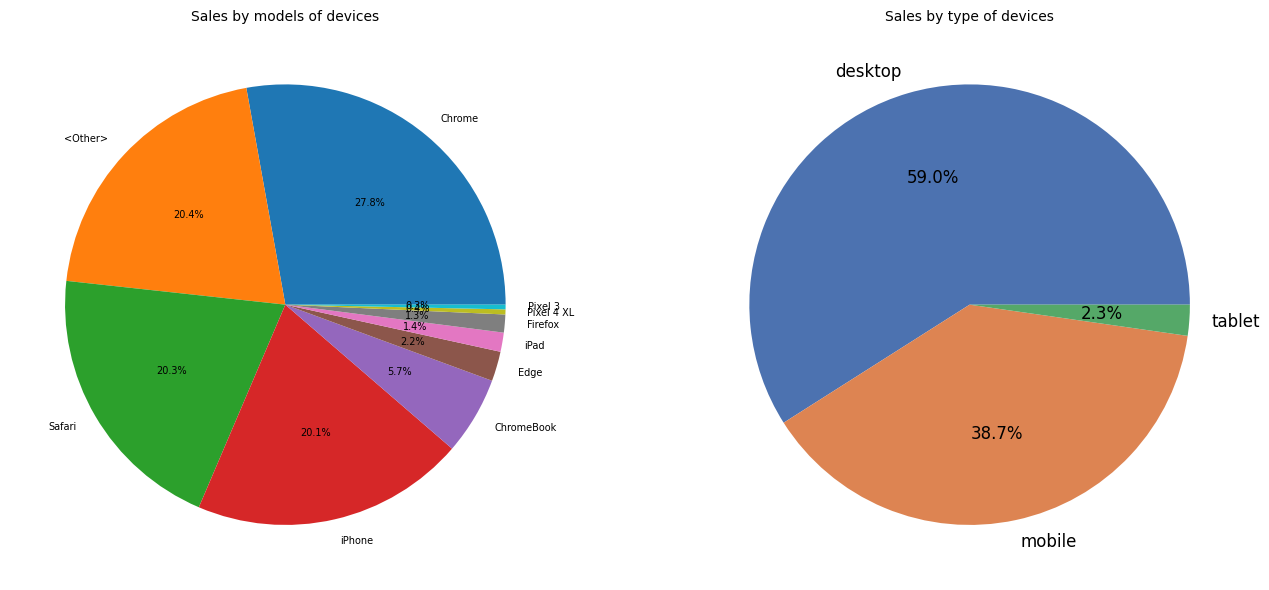

In [ ]:
# –ø—Ä–æ–¥–∞–∂—ñ —É —Ä–æ–∑—Ä—ñ–∑—ñ —Ç–∏–ø—ñ–≤ —Ç–∞ –º–æ–¥–µ–ª–µ–π –¥–µ–≤–∞–π—Å—ñ–≤ (—É % –≤—ñ–¥ –∑–∞–≥–∞–ª—å–Ω–∏—Ö –ø—Ä–æ–¥–∞–∂—ñ–≤)
# —Å—Ç–≤–æ—Ä—é—é –≥—Ä–∞—Ñ—ñ–∫
fig, axes = plt.subplots(1, 2, figsize=(14, 6))  # 1 row, 2 columns

# –ó–∞–¥–∞—é –ø–∞–ª—ñ—Ç—Ä—É –∫–æ–ª—å–æ—Ä—ñ–≤
palette = sns.color_palette("deep", len(df))

# –ü–µ—Ä—à–∏–π pie chart
top_model_sales.plot(kind='pie', autopct='%1.1f%%', labels=top_model_sales.index, color=palette, textprops={'fontsize': 7}, ax=axes[0])

axes[0].set_title("Sales by models of devices", fontsize=10)
axes[0].set_ylabel('')

# –î—Ä—É–≥–∏–π pie chart
top_device_sales.plot(kind='pie', autopct='%1.1f%%', labels=top_device_sales.index, colors=palette,  textprops={'fontsize': 12}, ax=axes[1])
axes[1].set_title("Sales by type of devices", fontsize=10)
axes[1].set_ylabel('')

plt.tight_layout()
plt.show()


–ù–∞–π–±—ñ–ª—å—à—ñ –ø—Ä–æ–¥–∞–∂—ñ –Ω–∞ –¥–µ–∫—Å—Ç–æ–ø—ñ (59%) —Ç–∞ –º–æ–±—ñ–ª—å–Ω—ñ–π –≤–µ—Ä—Å—ñ—ó (38,7%). –ü—Ä–∏ —Ü—å–æ–º—É —Å–µ—Ä–µ–¥ –º–æ–¥–µ–ª–µ–π –¥–µ–≤–∞–π—Å—ñ–≤ –Ω–∞–π–±–ª—ñ—à—É —á–∞—Å—Ç–∫—É –∑–∞–π–º–∞—é—Ç—å Chrome(27,8%), —ñ–Ω—à—ñ (20,4%), Safari(20,3) —Ç–∞ –ê–π—Ñ–æ–Ω (20,1%)

In [ ]:
# –ø—Ä–æ–¥–∞–∂—ñ –∑–∞ –¥–∂–µ—Ä–µ–ª–∞–º–∏ —Ç—Ä–∞—Ñ—ñ–∫—É (—É % –≤—ñ–¥ –∑–∞–≥–∞–ª—å–Ω–∏—Ö –ø—Ä–æ–¥–∞–∂—ñ–≤)
top_traffic_sales = df.groupby('traffic_channel')['price'].sum().sort_values(ascending=False).reset_index()
top_traffic_sales["percent_of_total"] = top_traffic_sales["price"] / top_traffic_sales["price"].sum() *100
top_traffic_sales

traffic_channel       price  percent_of_total
0  Organic Search  11433151.6         35.760189
1     Paid Search   8511049.4         26.620546
2          Direct   7494923.4         23.442345
3   Social Search   2532105.7          7.919827
4       Undefined   2000501.0          6.257093

–ó–∞ –¥–∂–µ—Ä–µ–ª–∞–º–∏ —Ç—Ä–∞—Ñ—ñ–∫—É –Ω–∞–π–±—ñ–ª—å—à—ñ –ø—Ä–æ–¥–∞–∂—ñ –Ω–∞ Organic —Ç–∞ Paid Search 35,76% —Ç–∞ 26,62% –≤—ñ–¥–ø–æ–≤—ñ–¥–Ω–æ, Direct –Ω–∞ —Ç—Ä–µ—Ç—å–æ–º—É –º—ñ—Å—Ü—ñ —ñ–∑ 23,44% –≤—ñ–¥ –∑–∞–≥–∞–ª—å–Ω–∏—Ö –ø—Ä–æ–¥–∞–∂—ñ–≤.

In [ ]:
# –≤—ñ–¥—Å–æ—Ç–æ–∫ –∑–∞—Ä–µ—î—Å—Ç—Ä–æ–≤–∞–Ω–∏—Ö –∫–æ—Ä–∏—Å—Ç—É–≤–∞—á—ñ–≤, —è–∫—ñ –ø—ñ–¥—Ç–≤–µ—Ä–¥–∏–ª–∏ —Å–≤–æ—é –µ–ª–µ–∫—Ç—Ä–æ–Ω–Ω—É –∞–¥—Ä–µ—Å—É
registered_users = df['account_id'].notnull().count()
verified_users = df['is_verified'].sum()
registered_verified_users = verified_users / registered_users * 100
registered_verified_users

np.float64(5.930586200727532)

In [ ]:
# –≤—ñ–¥—Å–æ—Ç–æ–∫ –∑–∞—Ä–µ—î—Å—Ç—Ä–æ–≤–∞–Ω–∏—Ö –∫–æ—Ä–∏—Å—Ç—É–≤–∞—á—ñ–≤, —è–∫—ñ –≤—ñ–¥–ø–∏—Å–∞–ª–∏—Å—è –≤—ñ–¥ —Ä–æ–∑—Å–∏–ª–∫–∏
unsubscribed_users = df['is_unsubscribed'].sum()
registered_unsubscribed_users = unsubscribed_users / registered_users * 100
registered_unsubscribed_users

np.float64(1.332816506649174)

In [ ]:
# –ø–æ–≤–µ–¥—ñ–Ω–∫–∞ (—É –ø–ª–∞–Ω—ñ –ø—Ä–æ–¥–∞–∂—ñ–≤) —Ç–∏—Ö, —Ö—Ç–æ –≤—ñ–¥–ø–∏—Å–∞–≤—Å—è –≤—ñ–¥ —Ä–æ–∑—Å–∏–ª–∫–∏ —Ç–∞ —Ç–∏—Ö, —Ö—Ç–æ –¥–æ—Å—ñ –ø—ñ–¥–ø–∏—Å–∞–Ω–∏–π
top_subscribed_sales = df.groupby('is_unsubscribed')['price'].sum().reset_index()
top_subscribed_sales["percent_of_total_price"] = top_subscribed_sales["price"] / top_subscribed_sales["price"].sum() *100
top_subscribed_sales["number_of_orders"] = df.groupby('is_unsubscribed')['product_name'].count()
top_subscribed_sales["percent_of_total_orders"] = top_subscribed_sales["number_of_orders"] / top_subscribed_sales["number_of_orders"].sum() *100
top_subscribed_sales["average_price"] = df.groupby('is_unsubscribed')['price'].mean()
top_subscribed_sales

is_unsubscribed      price  percent_of_total_price  number_of_orders  \
0                0  2150796.9               83.282923              2334   
1                1   431721.6               16.717077               447   

   percent_of_total_orders  average_price  
0                83.926645     921.506812  
1                16.073355     965.820134

–ù–∞ –ø–æ–∫—É–ø—Ü—ñ–≤, —è–∫—ñ –ø—ñ–¥–ø–∏—Å–∞–ª–∏—Å—è –Ω–∞ —Ä–æ–∑—Å–∏–ª–∫—É –ø—Ä–∏–ø–∞–¥–∞—î 84% –∑–∞–º–æ–≤–ª–µ–Ω—å —Ç–∞ 83% –≤—ñ–¥ –∑–∞–≥–∞–ª—å–Ω–æ–≥–æ –¥–æ—Ö–æ–¥—É. –°–µ—Ä–µ–¥–Ω—è —Ü—ñ–Ω–∞ –∑–∞–º–æ–≤–ª–µ–Ω–Ω—è –±—ñ–ª—å—à–∞ —É –ø–æ–∫—É–ø—Ü—ñ–≤, —è–∫—ñ –Ω–µ –ø—ñ–¥–ø–∏—Å–∞–ª–∏—Å—è –Ω–∞ —Ä–æ–∑—Å–∏–ª–∫—É.

In [ ]:
# —Ç–æ–ø-10 –∫—Ä–∞—ó–Ω –∑–∞ –∫—ñ–ª—å–∫—ñ—Å—Ç—é –∑–∞—Ä–µ—î—Å—Ç—Ä–æ–≤–∞–Ω–∏—Ö –∫–æ—Ä–∏—Å—Ç—É–≤–∞—á—ñ–≤
registered_users_by_countries = df.groupby('country')['account_id'].count().sort_values(ascending=False).reset_index()
registered_users_by_countries["percent_of_total"] = registered_users_by_countries["account_id"] / registered_users_by_countries["account_id"].sum() *100
registered_users_by_countries.head(10)

country  account_id  percent_of_total
0   United States        1207         43.401654
1           India         246          8.845739
2          Canada         207          7.443366
3  United Kingdom          88          3.164329
4          France          56          2.013664
5         Germany          56          2.013664
6          Taiwan          51          1.833873
7           China          48          1.725998
8           Spain          48          1.725998
9       Singapore          44          1.582165

–ù–∞–π–±—ñ–ª—å—à–µ –∑–∞—Ä–µ—î—Å—Ç—Ä–æ–≤–∞–Ω–∏—Ö –∫–æ—Ä–∏—Å—Ç—É–≤–∞—á—ñ–≤ —É –ê–º–µ—Ä–∏—Ü—ñ (43.4%) –Ω–∞ –¥—Ä—É–≥–æ–º—ñ –º—ñ—Å—Ü—ñ –Ü–Ω–¥—ñ—è (8.85%) —Ç–∞ –ö–∞–Ω–∞–¥–∞ (7.44%) –≤—ñ–¥–ø–æ–≤—ñ–¥–Ω–æ.

In [ ]:
# –≤—ñ–¥—Å–æ—Ç–æ–∫ –∫–æ—Ä–∏—Å—Ç—É–≤–∞—á—ñ–≤, —è–∫—ñ –ø—ñ–¥–ø–∏—Å–∞–ª–∏—Å—è –Ω–∞ —Ä–æ–∑—Å–∏–ª–∫—É (—Ç–æ–ø 10 –∫—Ä–∞—ó–Ω)
subscribed_users_by_countries = df[df['is_unsubscribed'] == 0].groupby('country')['is_unsubscribed'].count().sort_values(ascending=False).reset_index()
subscribed_users_by_countries['percent_of'] = subscribed_users_by_countries['is_unsubscribed'] / registered_users_by_countries ['account_id'] *100
subscribed_users_by_countries.head(10)

country  is_unsubscribed  percent_of
0   United States             1012   83.844242
1           India              210   85.365854
2          Canada              171   82.608696
3  United Kingdom               71   80.681818
4          France               50   89.285714
5         Germany               50   89.285714
6          Taiwan               43   84.313725
7           China               40   83.333333
8       Singapore               40   83.333333
9           Spain               39   88.636364

–°–µ—Ä–µ–¥ –∑–∞—Ä–µ—î—Å—Ç—Ä–æ–≤–∞–Ω–∏—Ö –∫—Ä–∞—ó–Ω –Ω–∞–π–±—ñ–ª—å—à–µ –∫–æ—Ä–∏—Å—Ç—É–≤–∞—á—ñ–≤, —è–∫—ñ –ø—ñ–¥–ø–∏—Å–∞–ª–∏—Å—è –Ω–∞ —Ä–æ–∑—Å–∏–ª–∫—É —Ç–∞–∫ —Å–∞–º–æ —É –ê–º–µ—Ä–∏—Ü—ñ, –Ü–Ω–¥—ñ—ó —Ç–∞ –ö–∞–Ω–∞–¥—ñ. –£ –§—Ä–∞–Ω—Ü—ñ—ó —Ç–∞ –ù—ñ–º–µ—á—á–∏–Ω—ñ —Å–ø–æ—Å—Ç–µ—Ä—ñ–≥–∞—î—Ç—å—Å—è –Ω–∞–π–±—ñ–ª—å—à–∏–π –≤—ñ–¥—Å–æ—Ç–æ–∫ –∑–∞—Ä–µ—î—Å—Ç—Ä–æ–≤–∞–Ω–∏—Ö –∫–æ—Ä–∏—Å—Ç—É–≤–∞—á—ñ–≤, —è–∫—ñ –ø—ñ–¥–ø–∏—Å–∞–ª–∏—Å—è –Ω–∞ —Ä–æ–∑—Å–∏–ª–∫—É. –£ –ë—Ä–∏—Ç–∞–Ω—ñ—ó —Ç–∞ –ö–∞–Ω–∞–¥—ñ –Ω–∞–π–º–µ–Ω—à–∏–π.

#–ê–Ω–∞–ª—ñ–∑ –¥–∏–Ω–∞–º—ñ–∫–∏ –ø—Ä–æ–¥–∞–∂—ñ–≤

In [ ]:
df.head()

date  session_id  continent    country   device  browser  \
0 2020-12-24  5726438444  (not set)  (not set)  desktop   Chrome   
1 2020-12-13  5614986004  (not set)  (not set)  desktop  <Other>   
2 2020-11-05  8542454082  (not set)  (not set)  desktop   Chrome   
3 2020-12-16  1717992506  (not set)  (not set)   mobile   Safari   
4 2021-01-16  8416141289  (not set)  (not set)  desktop   Chrome   

  mobile_model_name operating_system language    traffic_name traffic_channel  \
0            Chrome              Web     None      (referral)     Paid Search   
1           <Other>              Web    en-ca       (organic)  Organic Search   
2            Safari              Web    en-us  (data deleted)       Undefined   
3            iPhone              Web    en-us  (data deleted)       Undefined   
4            Safari              Web    en-gb        (direct)          Direct   

   account_id  is_unsubscribed  is_verified            product_category  \
0        <NA>             <NA>         <NA>        Cabinets & cupboards   
1        <NA>             <NA>         <NA>              Tables & desks   
2        <NA>             <NA>         <NA>                      Chairs   
3        <NA>             <NA>         <NA>                        Beds   
4        <NA>             <NA>         <NA>  Bookcases & shelving units   

  product_name   price                               short_description  
0      LIXHULT   356.0   Wall-mounted cabinet combination, 50x25x50 cm  
1       BEKANT  1325.0                                 Desk, 140x60 cm  
2      ANTILOP    20.0                                           Cover  
3      SUNDVIK   849.0  Ext bed frame with slatted bed base, 80x200 cm  
4        ALGOT   130.0          Wall upright/drying rack, 66x41x197 cm

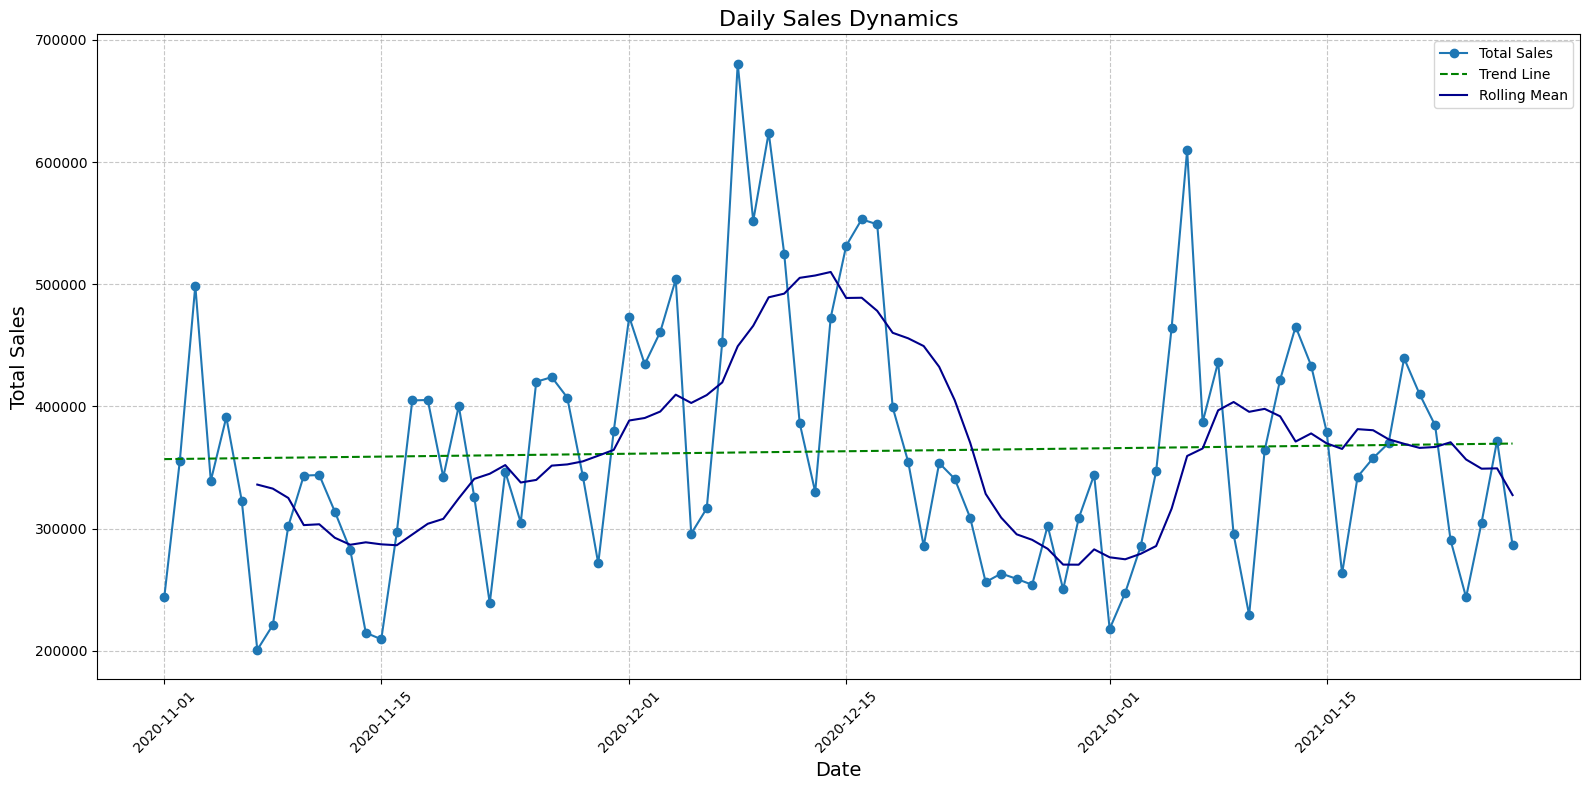

In [ ]:
# –∑–∞–≥–∞–ª—å–Ω—ñ –ø—Ä–æ–¥–∞–∂—ñ –Ω–∞ –∫–æ–∂–Ω—É –¥–∞—Ç—É,
sales_by_day = df.groupby('date')['price'].sum().reset_index()
sales_by_day['7_days_avg'] = sales_by_day['price'].rolling(window=7).mean()

# –≤—ñ–∑—É–∞–ª—ñ–∑–∞—Ü—ñ—è –∑–∞–≥–∞–ª—å–Ω–æ—ó –¥–∏–Ω–∞–º—ñ–∫–∏ –ø—Ä–æ–¥–∞–∂—ñ–≤
plt.figure(figsize=(16, 8))

# —Ä–æ–∑—Ä–∞—Ö—É–Ω–æ–∫ –ª—ñ–Ω—ñ–π–Ω–æ—ó —Ä–µ–≥—Ä–µ—Å—ó
x = np.arange(len(sales_by_day['date']))
y = sales_by_day['price']

z = np.polyfit(x, y, 1)
p = np.poly1d(z)

# –õ—ñ–Ω—ñ–π–Ω–∏–π –≥—Ä–∞—Ñ—ñ–∫
plt.plot(sales_by_day['date'], sales_by_day['price'], marker='o', linestyle='-', label='Total Sales')

# –õ—ñ–Ω—è —Ç—Ä–µ–Ω–¥—É
plt.plot(sales_by_day['date'], p(x), color='green', linestyle='--', label='Trend Line')

plt.plot(sales_by_day['date'], sales_by_day['7_days_avg'], color='darkblue', linestyle='-', label='Rolling Mean')

# –î–æ–¥–∞–≤–∞–Ω–Ω—è –ø—ñ–¥–ø–∏—Å—ñ–≤ —ñ –ª–µ–≥–µ–Ω–¥–∏
plt.title('Daily Sales Dynamics', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Total Sales', fontsize=14)
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()

plt.tight_layout()
plt.show()


–°–ø–æ—Å—Ç–µ—Ä—ñ–≥–∞—î—Ç—å—Å—è —Å–µ–∑–æ–Ω–Ω—ñ—Å—Ç—å –ø—Ä–æ–¥–∞–∂—ñ–≤. –ù–∞–π–±—ñ–ª—å—à–∏–π –ø—ñ–∫ –ø—Ä–∏–ø–∞–¥–∞—î –Ω–∞ –≥—Ä—É–¥–µ–Ω—å, —â–æ –ø–æ–≤—è–∑–∞–Ω–æ —ñ–∑ –Ω–æ–≤–æ—Ä—ñ—á–Ω–∏–º–∏ —Å–≤—è—Ç–∞–º–∏. –í —Ü—ñ–ª–æ–º—É –ø—Ä–æ–¥–∞–∂—ñ –º–∞—é—Ç—å –Ω–µ–∑–Ω–∞—á–Ω–∏–π —Ç—Ä–µ–Ω–¥ –¥–æ –∑—Ä–æ—Å—Ç–∞–Ω–Ω—è.

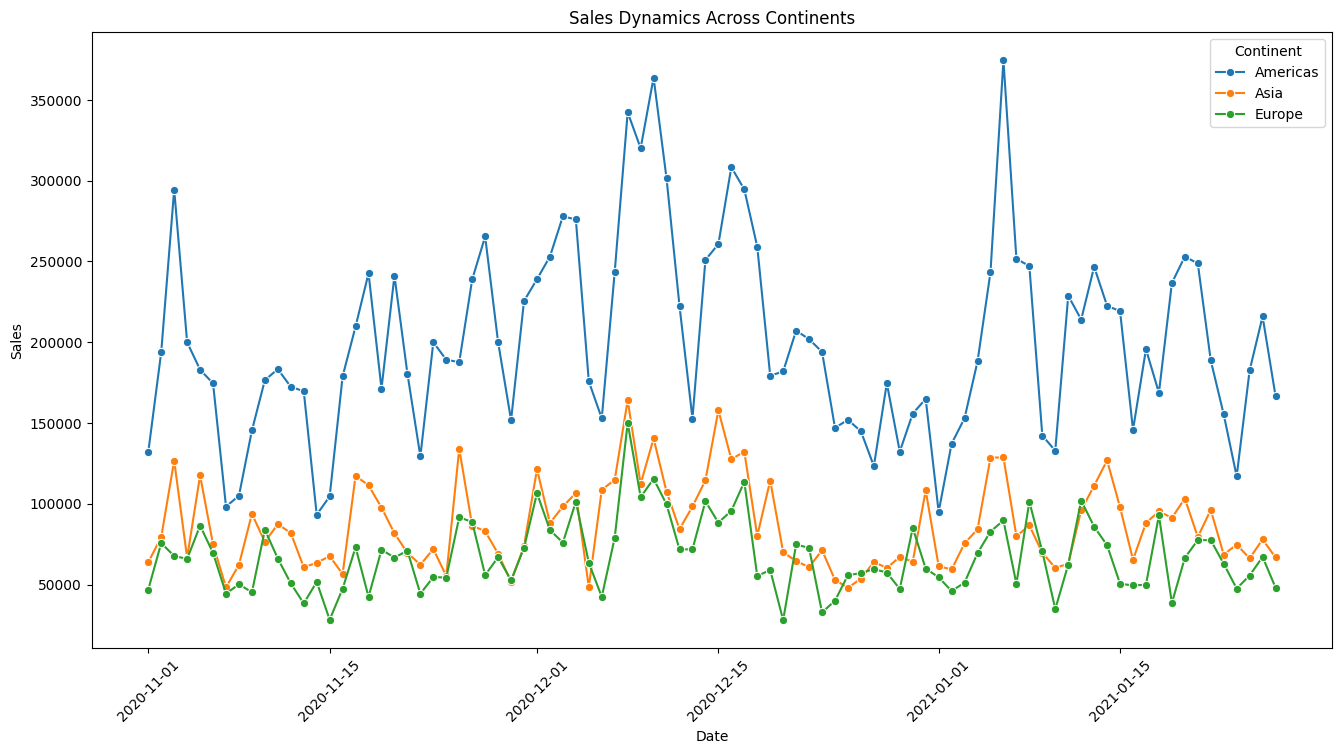

In [ ]:
# –¥–∏–Ω–∞–º—ñ–∫–∞ –ø—Ä–æ–¥–∞–∂—ñ–≤ –≤ –ê–º–µ—Ä–∏—Ü—ñ, –ê–∑—ñ—ó —Ç–∞ –Ñ–≤—Ä–æ–ø—ñ
sales_by_continents = (df[df["continent"].isin(["Americas", "Asia", "Europe"])].groupby(['date', 'continent'])['price'].sum().sort_values(ascending=False).reset_index())

# –≤—ñ–∑—É–∞–ª—ñ–∑–∞—Ü—ñ—è –∑–∞–≥–∞–ª—å–Ω–æ—ó –¥–∏–Ω–∞–º—ñ–∫–∏ –ø—Ä–æ–¥–∞–∂—ñ–≤ –≤ –ê–º–µ—Ä–∏—Ü—ñ, –ê–∑—ñ—ó —Ç–∞ –Ñ–≤—Ä–æ–ø—ñ
plt.figure(figsize=(16, 8))
sns.lineplot(data=sales_by_continents, x="date", y="price", hue="continent", marker="o")

# –¥–æ–¥–∞–≤–∞–Ω–Ω—è –ø—ñ–¥–ø–∏—Å—ñ–≤ —ñ –ª–µ–≥–µ–Ω–¥–∏
plt.title("Sales Dynamics Across Continents")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.xticks(rotation=45)
plt.legend(title="Continent")

plt.show()

–°–µ–∑–æ–Ω–Ω—ñ—Å—Ç—å –ø—Ä–æ–¥–∞–∂—ñ–≤ –∑–∞ –∫–æ–Ω—Ç–∏–Ω–µ–Ω—Ç–∞–º–∏ –≤—ñ–¥–ø–æ–≤—ñ–¥–∞—î –∑–∞–≥–∞–ª—å–Ω–æ–º—É —Ç—Ä–µ–Ω–¥—É. –ù–∞–π–±—ñ–ª—å—à—ñ –ø—Ä–æ–¥–∞–∂—ñ —Å–ø–æ—Å—Ç–µ—Ä—ñ–≥–∞—é—Ç—å—Å—è –≤ –ê–º–µ—Ä–∏–∫–∞—Ö. –ü—Ä–æ–¥–∞–∂—ñ –≤ –Ñ–≤—Ä–æ–ø—ñ —Ç–∞ –ê–∑—ñ—ó –º–∞–π–∂–µ –Ω–∞ –æ–¥–Ω–æ–º—É —Ä—ñ–≤–Ω—ñ.

In [ ]:
# –¥–∏–Ω–∞–º—ñ–∫–∞ –ø—Ä–æ–¥–∞–∂—ñ–≤ —É —Ä–æ–∑—Ä—ñ–∑—ñ –∫–∞–Ω–∞–ª—ñ–≤ —Ç—Ä–∞—Ñ—ñ–∫—É
sales_by_continents = (df.groupby(['date', 'traffic_channel'])['price'].sum().sort_values(ascending=False).reset_index())

# –≤—ñ–∑—É–∞–ª—ñ–∑–∞—Ü—ñ—è –∑–∞–≥–∞–ª—å–Ω–æ—ó –¥–∏–Ω–∞–º—ñ–∫–∏ –ø—Ä–æ–¥–∞–∂—ñ–≤ –≤ –ê–º–µ—Ä–∏—Ü—ñ, –ê–∑—ñ—ó —Ç–∞ –Ñ–≤—Ä–æ–ø—ñ
plt.figure(figsize=(16, 8))
sns.lineplot(data=sales_by_continents, x="date", y="price", hue="traffic_channel", marker="o")

# –¥–æ–¥–∞–≤–∞–Ω–Ω—è –ø—ñ–¥–ø–∏—Å—ñ–≤ —ñ –ª–µ–≥–µ–Ω–¥–∏
plt.title("Sales Dynamics Across Traffic Channels")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.xticks(rotation=45)
plt.legend(title="Traffic Channels")

plt.show()

–ó–∞ –¥–∂–µ—Ä–µ–ª–∞–º–∏ —Ç—Ä–∞—Ñ—ñ–∫—É –Ω–∞–π–±—ñ–ª—å—à—ñ –ø—Ä–æ–¥–∞–∂—ñ –Ω–∞ Organic, Paid Search —Ç–∞ Direct.


In [ ]:
# –¥–∏–Ω–∞–º—ñ–∫–∞ –ø—Ä–æ–¥–∞–∂—ñ–≤ —É —Ä–æ–∑—Ä—ñ–∑—ñ —Ç–∏–ø—ñ–≤ –¥–µ–≤–∞–π—Å—ñ–≤
sales_by_continents = (df.groupby(['date', 'device'])['price'].sum().sort_values(ascending=False).reset_index())

# –≤—ñ–∑—É–∞–ª—ñ–∑–∞—Ü—ñ—è –∑–∞–≥–∞–ª—å–Ω–æ—ó –¥–∏–Ω–∞–º—ñ–∫–∏ –ø—Ä–æ–¥–∞–∂—ñ–≤ –≤ –ê–º–µ—Ä–∏—Ü—ñ, –ê–∑—ñ—ó —Ç–∞ –Ñ–≤—Ä–æ–ø—ñ
plt.figure(figsize=(16, 8))
sns.lineplot(data=sales_by_continents, x="date", y="price", hue="device", marker="o")

# –¥–æ–¥–∞–≤–∞–Ω–Ω—è –ø—ñ–¥–ø–∏—Å—ñ–≤ —ñ –ª–µ–≥–µ–Ω–¥–∏
plt.title("Sales Dynamics Across Devices")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.xticks(rotation=45)
plt.legend(title="Continent")

plt.show()

–ù–∞–π–±—ñ–ª—å—à—ñ –ø—Ä–æ–¥–∞–∂—ñ –ø—Ä–∏–ø–∞–¥–∞—é—Ç—å –Ω–∞ –¥–µ–∫—Å—Ç–æ–ø –≤–µ—Ä—Å—ñ—é –¥–µ–≤–∞–π—Å—ñ–≤, —Ç—Ä–æ—Ö–∏ –º–µ–Ω—à–µ –Ω–∞ –º–æ–±—ñ–ª—å–Ω—É. –ü–ª–∞–Ω—à–µ—Ç–∏ –º–∞–π–∂–µ –Ω–µ –≤–ø–ª–∏–≤–∞—é—Ç—å –Ω–∞ –∑–∞–≥–∞–ª—å–Ω—ñ –ø—Ä–æ–¥–∞–∂—ñ.

#–ó–≤–µ–¥–µ–Ω—ñ —Ç–∞–±–ª–∏—Ü—ñ

In [ ]:
df.head()

date  session_id  continent    country   device  browser  \
0 2020-12-24  5726438444  (not set)  (not set)  desktop   Chrome   
1 2020-12-13  5614986004  (not set)  (not set)  desktop  <Other>   
2 2020-11-05  8542454082  (not set)  (not set)  desktop   Chrome   
3 2020-12-16  1717992506  (not set)  (not set)   mobile   Safari   
4 2021-01-16  8416141289  (not set)  (not set)  desktop   Chrome   

  mobile_model_name operating_system language    traffic_name traffic_channel  \
0            Chrome              Web     None      (referral)     Paid Search   
1           <Other>              Web    en-ca       (organic)  Organic Search   
2            Safari              Web    en-us  (data deleted)       Undefined   
3            iPhone              Web    en-us  (data deleted)       Undefined   
4            Safari              Web    en-gb        (direct)          Direct   

   account_id  is_unsubscribed  is_verified            product_category  \
0        <NA>             <NA>         <NA>        Cabinets & cupboards   
1        <NA>             <NA>         <NA>              Tables & desks   
2        <NA>             <NA>         <NA>                      Chairs   
3        <NA>             <NA>         <NA>                        Beds   
4        <NA>             <NA>         <NA>  Bookcases & shelving units   

  product_name   price                               short_description  
0      LIXHULT   356.0   Wall-mounted cabinet combination, 50x25x50 cm  
1       BEKANT  1325.0                                 Desk, 140x60 cm  
2      ANTILOP    20.0                                           Cover  
3      SUNDVIK   849.0  Ext bed frame with slatted bed base, 80x200 cm  
4        ALGOT   130.0          Wall upright/drying rack, 66x41x197 cm

In [ ]:
# –∑–≤–µ–¥–µ–Ω–∞ —Ç–∞–±–ª–∏—Ü—è, —è–∫–∞ –ø–æ–∫–∞–∑—É—î —Å—É–º—É –ø—Ä–æ–¥–∞–∂—ñ–≤ —É —Ä–æ–∑—Ä—ñ–∑—ñ –º–æ–¥–µ–ª–µ–π –¥–µ–≤–∞–π—Å—ñ–≤
pivot_table = pd.pivot_table(df, values="price", columns="mobile_model_name", aggfunc="sum")
print(pivot_table)

mobile_model_name    <Other>     Chrome  ChromeBook      Edge   Firefox  \
price              6535330.8  8899523.9   1830458.7  697222.3  421066.9   

mobile_model_name   Pixel 3  Pixel 4 XL     Safari      iPad     iPhone  
price              109148.2    118287.7  6491062.1  448854.2  6420776.3  


In [ ]:
# –∑–≤–µ–¥–µ–Ω–∞ —Ç–∞–±–ª–∏—Ü—è, —è–∫–∞ –ø–æ–∫–∞–∑—É—î —è–∫–∞ –∫—ñ–ª—å–∫—ñ—Å—Ç—å –∑–∞—Ä–µ—î—Å—Ç—Ä–æ–≤–∞–Ω–∏—Ö –∫–æ—Ä–∏—Å—Ç—É–≤–∞—á—ñ–≤ —Å—Ç–≤–æ—Ä–∏–ª–∞ –∞–∫–∞—É–Ω—Ç —Ç–∞ –ø—ñ–¥–ø–∏—Å–∞–ª–∞—Å—è –Ω–∞ —Ä–æ–∑—Å–∏–ª–∫—É
pivot_table = pd.pivot_table(df, values="account_id", index="is_unsubscribed", columns="is_verified", aggfunc="count")
print(pivot_table)

is_verified        0     1
is_unsubscribed           
0                748  1586
1                 44   403


In [ ]:
# –∑–≤–µ–¥–µ–Ω–∞ —Ç–∞–±–ª–∏—Ü—è, —è–∫–∞ –ø–æ–∫–∞–∑—É—î –∫—ñ–ª—å–∫—ñ—Å—Ç—å —Å–µ—Å—ñ–π —É —Ä–æ–∑—Ä—ñ–∑—ñ –∫–∞–Ω–∞–ª—ñ–≤ —Ç—Ä–∞—Ñ—ñ–∫—É —Ç–∞ —Ç–∏–ø—ñ–≤ –¥–µ–≤–∞–π—Å—ñ–≤
pivot_table = pd.pivot_table(df, values="session_id", index="traffic_channel", columns="device", aggfunc="count")
print(pivot_table)

device           desktop  mobile  tablet
traffic_channel                         
Direct              4655    2985     160
Organic Search      7011    4655     255
Paid Search         5261    3574     207
Social Search       1594    1065      57
Undefined           1181     834      44


In [ ]:
# –∑–≤–µ–¥–µ–Ω–∞ —Ç–∞–±–ª–∏—Ü—è, —è–∫–∞ –ø–æ–∫–∞–∑—É—î —Å—É–º—É –ø—Ä–æ–¥–∞–∂—ñ–≤ —É —Ä–æ–∑—Ä—ñ–∑—ñ –∫–∞–Ω–∞–ª—ñ–≤ —Ç—Ä–∞—Ñ—ñ–∫—É —Ç–∞ —Ç–∏–ø—ñ–≤ –¥–µ–≤–∞–π—Å—ñ–≤
pivot_table = pd.pivot_table(df, values="price", index="traffic_channel", columns="device", aggfunc="sum")
print(pivot_table)

device             desktop     mobile    tablet
traffic_channel                                
Direct           4472609.4  2875317.9  146996.1
Organic Search   6794107.8  4408875.1  230168.7
Paid Search      4976977.8  3330032.6  204039.0
Social Search    1447384.8  1006707.3   78013.6
Undefined        1172959.2   763292.9   64248.9


In [ ]:
# –∑–≤–µ–¥–µ–Ω–∞ —Ç–∞–±–ª–∏—Ü—è, —è–∫–∞ –ø–æ–∫–∞–∑—É—î –∑–∞–≥–∞–ª—å–Ω—ñ –ø—Ä–æ–¥–∞–∂—ñ –∑–∞ –∫–∞—Ç–µ–≥–æ—Ä—ñ—è–º–∏ —Ç–æ–≤–∞—Ä—ñ–≤ (—Ç–æ–ø-10 –∫–∞—Ç–µ–≥–æ—Ä—ñ–π) —É —Ç–æ–ø-5 –∫—Ä–∞—ó–Ω
pivot_table = pd.pivot_table(df, values="price", index="product_category", columns="country", aggfunc="sum")

# –í–∏–±–∏—Ä–∞—î–º–æ —Ç–æ–ø 10 –∫–∞—Ç–µ–≥–æ—Ä—ñ–π —Ç–æ–≤–∞—Ä—ñ–≤ –∑–∞ —Ä–æ–∑–º—ñ—Ä–æ–º –ø—Ä–æ–¥–∞–∂—ñ–≤
top_categories = pivot_table.sum(axis=1).nlargest(10).index
pivot_table = pivot_table.loc[top_categories]

# –í–∏–±–∏—Ä–∞—î–º–æ —Ç–æ–ø 5 –∫—Ä–∞—ó–Ω –∑–∞ —Ä–æ–∑–º—ñ—Ä–æ–º –ø—Ä–æ–¥–∞–∂—ñ–≤
top_countries = pivot_table.sum(axis=0).nlargest(5).index
pivot_table = pivot_table[top_countries]

print(pivot_table)

country                           United States     India    Canada  \
product_category                                                      
Sofas & armchairs                     3707144.5  788430.0  692427.5   
Chairs                                2619773.8  544309.2  417740.8   
Beds                                  2213058.0  358319.5  354772.0   
Bookcases & shelving units            1567606.9  364507.4  278981.9   
Cabinets & cupboards                   994545.5  191888.0  181802.0   
Outdoor furniture                      929245.2  162289.4  185322.8   
Tables & desks                         777865.0  186157.5  132678.0   
Chests of drawers & drawer units       382388.0   73111.0   71952.0   
Bar furniture                          330805.0   57657.0   51724.0   
Children's furniture                   207575.0   39177.0   30264.0   

country                           United Kingdom    France  
product_category                                            
Sofas & armchairs        

#–°—Ç–∞—Ç–∏—Å—Ç–∏—á–Ω–∏–π –∞–Ω–∞–ª—ñ–∑ –≤–∑–∞—î–º–æ–∑–≤‚Äô—è–∑–∫—ñ–≤

###–í–∑–∞—î–º–æ–∑–≤—è–∑–æ–∫ –º—ñ–∂ –∫—ñ–ª—å–∫—ñ—Å—Ç—é —Å–µ—Å—ñ–π —Ç–∞ –∑–∞–≥–∞–ª—å–Ω–∏–º–∏ –ø—Ä–æ–¥–∞–∂–∞–º–∏

In [ ]:
# –∫—ñ–ª—å–∫—ñ—Å—Ç—å —Å–µ—Å—ñ–π —Ç–∞ –∑–∞–≥–∞–ª—å–Ω—ñ –ø—Ä–æ–¥–∞–∂—ñ –Ω–∞ –∫–æ–∂–Ω—É –¥–∞—Ç—É
pivot_table = pd.pivot_table(df, values=["session_id", "price"], index="date", aggfunc={"session_id": "count", "price": "sum"}).reset_index()
print(pivot_table)

         date     price  session_id
0  2020-11-01  244292.5         281
1  2020-11-02  355506.8         368
2  2020-11-03  498979.6         561
3  2020-11-04  339187.1         370
4  2020-11-05  391276.6         388
..        ...       ...         ...
83 2021-01-23  290605.5         313
84 2021-01-24  243818.4         296
85 2021-01-25  305089.3         370
86 2021-01-26  372057.3         385
87 2021-01-27  286340.7         299

[88 rows x 3 columns]


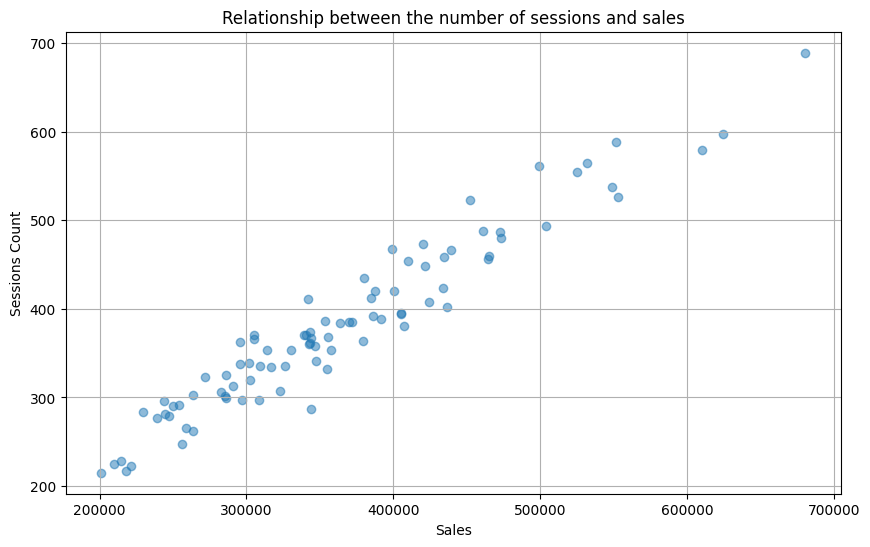

In [ ]:
# –≤—ñ–∑—É–∞–ª—ñ–∑–∞—Ü—ñ—è –¥–ª—è –≤—ñ–¥j–±—Ä–∞–∂–µ–Ω–Ω—è –≤–∑–∞—î–º–æ–∑–≤‚Äô—è–∑–∫—É –º—ñ–∂ –∫—ñ–ª—å–∫—ñ—Å—Ç—é —Å–µ—Å—ñ–π —Ç–∞ –∑–∞–≥–∞–ª—å–Ω–∏–º–∏ –ø—Ä–æ–¥–∞–∂–∞–º–∏
plt.figure(figsize=(10, 6))
plt.scatter(pivot_table["price"], pivot_table["session_id"], alpha=0.5)

# –¥–æ–¥–∞—î–º–æ –∑–∞–≥–æ–ª–æ–≤–æ–∫ —Ç–∞ –º—ñ—Ç–∫–∏
plt.xlabel("Sales")
plt.ylabel("Sessions Count")
plt.title("Relationship between the number of sessions and sales")
plt.grid(True)

# –≤—ñ–¥–æ–±—Ä–∞–∂–∞—î–º–æ –≥—Ä–∞—Ñ—ñ–∫
plt.show()

In [ ]:
# –≤–∏–¥–∞–ª—è—é datetime-—Å—Ç–æ–≤–ø—Ü—ñ –ø–µ—Ä–µ–¥ –∞–Ω–∞–ª—ñ–∑–æ–º
pivot_table = pivot_table.select_dtypes(exclude=['datetime64[ns]'])

# –ø—Ä–æ—Ö–æ–¥–∂—É –ø–æ –≤—Å—ñ—Ö —Å—Ç–æ–≤–ø—Ü—è—Ö —Ç–∞–±–ª–∏—Ü—ñ
for column in pivot_table.columns:
    # –≤–∏–¥–∞–ª—è—é NaN –∑–Ω–∞—á–µ–Ω–Ω—è
    clean_data = pivot_table[column].dropna()

    # –≤–∏–∫–æ–Ω—É—é —Ç–µ—Å—Ç –î‚Äô–ê–≥–æ—Å—Ç—ñ–Ω–æ-–ü—ñ—Ä—Å–æ–Ω–∞
    _, p_value_normaltest = normaltest(clean_data)

    # –≤–∏–≤–æ–¥–∂—É —Ä–µ–∑—É–ª—å—Ç–∞—Ç
    if p_value_normaltest < 0.05:
        print(f"‚ùå {column}: p-value = {p_value_normaltest:.5f} ‚Üí —Ä–æ–∑–ø–æ–¥—ñ–ª –ù–ï –Ω–æ—Ä–º–∞–ª—å–Ω–∏–π")
    else:
        print(f"‚úÖ {column}: p-value = {p_value_normaltest:.5f} ‚Üí —Ä–æ–∑–ø–æ–¥—ñ–ª –Ω–æ—Ä–º–∞–ª—å–Ω–∏–π")


‚ùå price: p-value = 0.00716 ‚Üí —Ä–æ–∑–ø–æ–¥—ñ–ª –ù–ï –Ω–æ—Ä–º–∞–ª—å–Ω–∏–π
‚ùå session_id: p-value = 0.02338 ‚Üí —Ä–æ–∑–ø–æ–¥—ñ–ª –ù–ï –Ω–æ—Ä–º–∞–ª—å–Ω–∏–π


–¢–µ—Å—Ç–∏ –ø–æ–∫–∞–∑–∞–ª–∏, —â–æ —Ä–æ–∑–ø–æ–¥—ñ–ª–∏ –Ω–µ —î –Ω–æ—Ä–º–∞–ª—å–Ω–∏–º–∏, —Ç–∞–∫–∏–º —á–∏–Ω–æ–º –¥–ª—è –∞–Ω–∞–ª—ñ–∑—É –∫–æ—Ä–µ–ª—è—Ü—ñ—ó –≤–∏–∫–æ—Ä–∏—Å—Ç–æ–≤–∏–≤–∞—Ç–∏–º—É —Ä–∞–Ω–≥–æ–≤—É –∫–æ—Ä–µ–ª—è—Ü—ñ—é –°–ø—ñ—Ä–º–µ–Ω–∞

In [ ]:
# –æ–±—á–∏—Å–ª—é—é –∫–æ—Ä–µ–ª—è—Ü—ñ—é –°–ø—ñ—Ä–º–µ–Ω–∞
correlation, p_value = spearmanr(pivot_table['price'], pivot_table['session_id'])

# –≤–∏–≤–æ–¥–∂—É —Ç–µ—Å—Ç–æ–≤—É —Å—Ç–∞—Ç–∏—Å—Ç–∏–∫—É —Ç–∞ p-–∑–Ω–∞—á–µ–Ω–Ω—è
print(f"Spearman correlation: {correlation:.5f}, p-value: {p_value:.5f}")

Spearman correlation: 0.95096, p-value: 0.00000


–î–∞–Ω—ñ —Ç–µ—Å—Ç—É —Å–≤—ñ–¥—á–∞—Ç—å –ø—Ä–æ —Å–∏–ª—å–Ω—É –ø–æ–∑–∏—Ç–∏–≤–Ω—É –∫–æ—Ä–µ–ª—è—Ü—ñ—é –º—ñ–∂ –¥–≤–æ–º–∞ –∑–º—ñ–Ω–Ω–∏–º–∏. –†–µ–∑—É–ª—å—Ç–∞—Ç–∏ —î —Å—Ç–∞—Ç–∏—Å—Ç–∏—á–Ω–æ –∑–Ω–∞—á—É—â–∏–º–∏.

###–ö–æ—Ä–µ–ª—è—Ü—ñ—è –ø—Ä–æ–¥–∞–∂—ñ–≤ –Ω–∞ —Ä—ñ–∑–Ω–∏—Ö –∫–æ–Ω—Ç–∏–Ω–µ–Ω—Ç–∞—Ö

In [ ]:
# –ø—Ä–æ–¥–∞–∂—ñ –Ω–∞ –∫–æ–Ω—Ç–∏–Ω–µ–Ω—Ç–∞—Ö
pivot_table = pd.pivot_table(df, values="price", index="date", columns="continent", aggfunc="sum")

# –≤–∏–±–∏—Ä–∞—é –ø—Ä–æ–¥–∞–∂—ñ –Ω–∞ —Ç–æ–ø 3 –∫–æ–Ω—Ç–∏–Ω–µ–Ω—Ç–∞—Ö
top_continents = pivot_table.sum(axis=0).nlargest(3).index
pivot_table = pivot_table[top_continents].reset_index()

print(pivot_table)

continent       date  Americas      Asia   Europe
0         2020-11-01  132002.5   63823.0  46908.0
1         2020-11-02  193861.0   79370.0  75710.8
2         2020-11-03  294529.8  126737.8  67692.0
3         2020-11-04  200009.5   66602.0  65915.0
4         2020-11-05  182988.2  117608.4  86540.0
..               ...       ...       ...      ...
83        2021-01-23  155342.9   68543.0  62883.6
84        2021-01-24  116989.4   74801.2  47534.8
85        2021-01-25  182548.1   66215.2  55621.0
86        2021-01-26  215973.0   77995.2  67143.1
87        2021-01-27  166735.5   66783.1  48156.1

[88 rows x 4 columns]


In [ ]:
# –≤–∏–¥–∞–ª—è—é datetime-—Å—Ç–æ–≤–ø—Ü—ñ –ø–µ—Ä–µ–¥ –∞–Ω–∞–ª—ñ–∑–æ–º
pivot_table = pivot_table.select_dtypes(exclude=['datetime64[ns]'])

# –ø—Ä–æ—Ö–æ–¥–∂—É –ø–æ –≤—Å—ñ—Ö —Å—Ç–æ–≤–ø—Ü—è—Ö —Ç–∞–±–ª–∏—Ü—ñ
for column in pivot_table.columns:
    # –≤–∏–¥–∞–ª—è—é NaN –∑–Ω–∞—á–µ–Ω–Ω—è
    clean_data = pivot_table[column].dropna()

    # –≤–∏–∫–æ–Ω—É—é —Ç–µ—Å—Ç –î‚Äô–ê–≥–æ—Å—Ç—ñ–Ω–æ-–ü—ñ—Ä—Å–æ–Ω–∞
    _, p_value_normaltest = normaltest(clean_data)

    # –≤–∏–≤–æ–¥–∂—É —Ä–µ–∑—É–ª—å—Ç–∞—Ç
    if p_value_normaltest < 0.05:
        print(f"‚ùå {column}: p-value = {p_value_normaltest:.5f} ‚Üí —Ä–æ–∑–ø–æ–¥—ñ–ª –ù–ï –Ω–æ—Ä–º–∞–ª—å–Ω–∏–π")
    else:
        print(f"‚úÖ {column}: p-value = {p_value_normaltest:.5f} ‚Üí —Ä–æ–∑–ø–æ–¥—ñ–ª –Ω–æ—Ä–º–∞–ª—å–Ω–∏–π")


‚úÖ Americas: p-value = 0.05795 ‚Üí —Ä–æ–∑–ø–æ–¥—ñ–ª –Ω–æ—Ä–º–∞–ª—å–Ω–∏–π
‚ùå Asia: p-value = 0.01791 ‚Üí —Ä–æ–∑–ø–æ–¥—ñ–ª –ù–ï –Ω–æ—Ä–º–∞–ª—å–Ω–∏–π
‚ùå Europe: p-value = 0.00246 ‚Üí —Ä–æ–∑–ø–æ–¥—ñ–ª –ù–ï –Ω–æ—Ä–º–∞–ª—å–Ω–∏–π


–û—Å–∫—ñ–ª—å–∫–∏ –≤ –ê–º–µ—Ä–∏—Ü—ñ –Ω–æ—Ä–º–∞–ª—å–Ω–∏–π —Ä–æ–∑–ø–æ–¥—ñ–ª, –∞–ª–µ –Ω–µ–Ω–æ—Ä–º–∞–ª—å–Ω–∏–π —É –Ñ–≤—Ä–æ–ø—ñ —Ç–∞ –ê–∑—ñ—ó, –ø–æ—Ç—Ä—ñ–±–Ω–æ –≤–∏–∫–æ—Ä–∏—Å—Ç–∞—Ç–∏ –º–µ—Ç–æ–¥ –∫–æ—Ä–µ–ª—è—Ü—ñ—ó –°–ø—ñ—Ä–º–µ–Ω–∞, –±–æ —Ö–æ—á–∞ –ê–º–µ—Ä–∏–∫–∞ –Ω–æ—Ä–º–∞–ª—å–Ω–∞, —ñ–Ω—à—ñ –∫–æ–Ω—Ç–∏–Ω–µ–Ω—Ç–∏ –Ω—ñ.

In [ ]:
# —Å–ø–∏—Å–æ–∫ –∫–æ–Ω—Ç–∏–Ω–µ–Ω—Ç—ñ–≤
continents = ['Americas', 'Europe', 'Asia']

# —Å—Ç–≤–æ—Ä—é—é –ø–æ—Ä–æ–∂–Ω—ñ–π —Å–ª–æ–≤–Ω–∏–∫ –¥–ª—è —Ä–µ–∑—É–ª—å—Ç–∞—Ç—ñ–≤
results = {}

# –ø–µ—Ä–µ–±–∏—Ä–∞—é –≤—Å—ñ —É–Ω—ñ–∫–∞–ª—å–Ω—ñ –ø–∞—Ä–∏ –∫–æ–Ω—Ç–∏–Ω–µ–Ω—Ç—ñ–≤
for i in range(len(continents)):
    for j in range(i + 1, len(continents)):
        x = pivot_table[continents[i]].dropna()
        y = pivot_table[continents[j]].dropna()

        # –≤–∏–∫–æ–Ω—É—é –∫–æ—Ä–µ–ª—è—Ü—ñ—é –°–ø—ñ—Ä–º–µ–Ω–∞
        spearman_corr, spearman_p = spearmanr(x, y)

        # –∑–±–µ—Ä—ñ–≥–∞—é —Ä–µ–∑—É–ª—å—Ç–∞—Ç–∏
        key = (continents[i], continents[j])
        results[key] = {'spearman_corr': spearman_corr, 'p_value': spearman_p}

# –≤–∏–≤–æ–¥–∂—É —Ä–µ–∑—É–ª—å—Ç–∞—Ç–∏
for key, value in results.items():
    print(f"üî∑ –ö–æ—Ä–µ–ª—è—Ü—ñ—è –°–ø—ñ—Ä–º–µ–Ω–∞ –º—ñ–∂ {key[0]} —Ç–∞ {key[1]}: r = {value['spearman_corr']:.5f}, p = {value['p_value']:.5f}")
    print("-" * 50)

üî∑ –ö–æ—Ä–µ–ª—è—Ü—ñ—è –°–ø—ñ—Ä–º–µ–Ω–∞ –º—ñ–∂ Americas —Ç–∞ Europe: r = 0.62588, p = 0.00000
--------------------------------------------------
üî∑ –ö–æ—Ä–µ–ª—è—Ü—ñ—è –°–ø—ñ—Ä–º–µ–Ω–∞ –º—ñ–∂ Americas —Ç–∞ Asia: r = 0.66854, p = 0.00000
--------------------------------------------------
üî∑ –ö–æ—Ä–µ–ª—è—Ü—ñ—è –°–ø—ñ—Ä–º–µ–Ω–∞ –º—ñ–∂ Europe —Ç–∞ Asia: r = 0.60822, p = 0.00000
--------------------------------------------------


–ó–Ω–∞—á–µ–Ω–Ω—è –∫–æ—Ä–µ–ª—è—Ü—ñ—ó > 0.6 –≤–∫–∞–∑—É—î –Ω–∞ –ø–æ–º—ñ—Ä–Ω–æ-—Å–∏–ª—å–Ω—É –∫–æ—Ä–µ–ª—è—Ü—ñ—é.
–í–∏—Å–æ–∫–∞ —Å—Ç–∞—Ç–∏—Å—Ç–∏—á–Ω–∞ –∑–Ω–∞—á—É—â—ñ—Å—Ç—å –≤–∫–∞–∑—É—î –Ω–∞ —Ç–µ, —â–æ —Ä–µ–∑—É–ª—å—Ç–∞—Ç–∏ –Ω–µ —î –≤–∏–ø–∞–¥–∫–æ–≤–∏–º–∏.
–ó–º—ñ–Ω–∏ –≤ –ø—Ä–æ–¥–∞–∂–∞—Ö –Ω–∞ –æ–¥–Ω–æ–º—É –∫–æ–Ω—Ç–∏–Ω–µ–Ω—Ç—ñ —Å—Ö–æ–∂—ñ –Ω–∞ –∑–º—ñ–Ω–∏ –Ω–∞ —ñ–Ω—à–∏—Ö, —â–æ –º–æ–∂–µ —Å–≤—ñ–¥—á–∏—Ç–∏ –ø—Ä–æ –≥–ª–æ–±–∞–ª—å–Ω—ñ —Ç—Ä–µ–Ω–¥–∏ –∞–±–æ –≤–∑–∞—î–º–æ–∑–∞–ª–µ–∂–Ω—ñ—Å—Ç—å —Ä–∏–Ω–∫—ñ–≤.

###–ö–æ—Ä–µ–ª—è—Ü—ñ—è –ø—Ä–æ–¥–∞–∂—ñ–≤ —á–µ—Ä–µ–∑ —Ä—ñ–∑–Ω—ñ –∫–∞–Ω–∞–ª–∏ —Ç—Ä–∞—Ñ—ñ–∫—É

In [ ]:
# –∑–≤–µ–¥–µ–Ω–∞ —Ç–∞–±–ª–∏—Ü—è –ø—Ä–æ –æ–±—Å—è–≥ –ø—Ä–æ–¥–∞–∂—ñ–≤ –∑–∞ —Ä—ñ–∑–Ω–∏–º–∏ –∫–∞–Ω–∞–ª–∞–º–∏ —Ç—Ä–∞—Ñ—ñ–∫—É
traffic_sales = pd.pivot_table(df, values="price", index="date", columns="traffic_channel", aggfunc="sum")
traffic_sales

traffic_channel    Direct  Organic Search  Paid Search  Social Search  \
date                                                                    
2020-11-01        54669.5         95112.0      64688.0        25078.0   
2020-11-02        81561.5        127746.5     104780.8        16843.0   
2020-11-03       102909.5        182521.9     152641.3        27652.5   
2020-11-04        79683.6        117067.1     100332.0        24257.4   
2020-11-05        83367.6        122938.4     107648.0        41693.2   
...                   ...             ...          ...            ...   
2021-01-23        88714.4         90686.0      73075.1        23095.0   
2021-01-24        58644.2         93413.6      59018.0        20596.1   
2021-01-25        67844.0        136178.6      66775.7        23809.0   
2021-01-26       109355.6        140921.2      91437.5        17008.0   
2021-01-27        70423.1         92921.1      80869.5        16282.0   

traffic_channel  Undefined  
date                        
2020-11-01          4745.0  
2020-11-02         24575.0  
2020-11-03         33254.4  
2020-11-04         17847.0  
2020-11-05         35629.4  
...                    ...  
2021-01-23         15035.0  
2021-01-24         12146.5  
2021-01-25         10482.0  
2021-01-26         13335.0  
2021-01-27         25845.0  

[88 rows x 5 columns]

In [ ]:
# –≤–∏–¥–∞–ª—è—é datetime —Å—Ç–æ–≤–ø—Ü—ñ –ø–µ—Ä–µ–¥ –∞–Ω–∞–ª—ñ–∑–æ–º
traffic_sales = traffic_sales.select_dtypes(exclude=['datetime64[ns]'])

# –ø—Ä–æ—Ö–æ–¥–∂—É –ø–æ –≤—Å—ñ—Ö —Å—Ç–æ–≤–ø—Ü—è—Ö —Ç–∞–±–ª–∏—Ü—ñ
for column in traffic_sales.columns:
  # –≤–∏–¥–∞–ª—è—é NaN –∑–Ω–∞—á–µ–Ω–Ω—è
    clean_data = traffic_sales[column].dropna()

    # –≤–∏–∫–æ–Ω—É—é —Ç–µ—Å—Ç –¥'–∞–≥–æ—Å—Ç—ñ–Ω–æ-–ø—ñ—Ä—Å–æ–Ω–∞ –¥–ª—è –ø–µ—Ä–µ–≤—ñ—Ä–∫–∏ –Ω–æ—Ä–º–∞–ª—å–Ω–æ—Å—Ç—ñ —Ä–æ–∑–ø–æ–¥—ñ–ª—É
    _, p_value_normaltest = normaltest(traffic_sales[column])

    # –≤–∏–≤–æ–¥–∂—É p-–∑–Ω–∞—á–µ–Ω–Ω—è –¥–ª—è –∫–æ–∂–Ω–æ–≥–æ —Å—Ç–æ–≤–ø—Ü—è
    if p_value_normaltest < 0.05:
        print(f"‚ùå {column}: p-value = {p_value_normaltest:.5f} ‚Üí —Ä–æ–∑–ø–æ–¥—ñ–ª –ù–ï –Ω–æ—Ä–º–∞–ª—å–Ω–∏–π")
    else:
        print(f"‚úÖ {column}: p-value = {p_value_normaltest:.5f} ‚Üí —Ä–æ–∑–ø–æ–¥—ñ–ª –Ω–æ—Ä–º–∞–ª—å–Ω–∏–π")

‚úÖ Direct: p-value = 0.06084 ‚Üí —Ä–æ–∑–ø–æ–¥—ñ–ª –Ω–æ—Ä–º–∞–ª—å–Ω–∏–π
‚ùå Organic Search: p-value = 0.00008 ‚Üí —Ä–æ–∑–ø–æ–¥—ñ–ª –ù–ï –Ω–æ—Ä–º–∞–ª—å–Ω–∏–π
‚ùå Paid Search: p-value = 0.00346 ‚Üí —Ä–æ–∑–ø–æ–¥—ñ–ª –ù–ï –Ω–æ—Ä–º–∞–ª—å–Ω–∏–π
‚úÖ Social Search: p-value = 0.11442 ‚Üí —Ä–æ–∑–ø–æ–¥—ñ–ª –Ω–æ—Ä–º–∞–ª—å–Ω–∏–π
‚ùå Undefined: p-value = 0.03995 ‚Üí —Ä–æ–∑–ø–æ–¥—ñ–ª –ù–ï –Ω–æ—Ä–º–∞–ª—å–Ω–∏–π


In [ ]:
# —Å—Ç–≤–æ—Ä—é—é –ø–æ—Ä–æ–∂–Ω—ñ–π —Å–ª–æ–≤–Ω–∏–∫ –¥–ª—è –∑–±–µ—Ä–µ–∂–µ–Ω–Ω—è —Ä–µ–∑—É–ª—å—Ç–∞—Ç—ñ–≤
results = {}

# –æ—Ç—Ä–∏–º—É—é –∫–∞—Ç–µ–≥–æ—Ä—ñ—ó —Ç—Ä–∞—Ñ—ñ–∫—É –∑ –¥–∞—Ç–∞—Ñ—Ä–µ–π–º
channels = traffic_sales.columns

# –Ω–æ—Ä–º–∞–ª—å–Ω—ñ —Ç–∞ –Ω–µ–Ω–æ—Ä–º–∞–ª—å–Ω—ñ –∫–∞–Ω–∞–ª–∏ (–≤–∫–∞–∑–∞–Ω—ñ –∑–∞ —Ä–µ–∑—É–ª—å—Ç–∞—Ç–∞–º–∏ —Ç–µ—Å—Ç—É)
normal_channels = {'Direct', 'Social Search'}
non_normal_channels = {'Organic Search', 'Paid Search', 'Undefined'}

# –ø–µ—Ä–µ–±–∏—Ä–∞—é –≤—Å—ñ —É–Ω—ñ–∫–∞–ª—å–Ω—ñ –ø–∞—Ä–∏ –∫–∞–Ω–∞–ª—ñ–≤
for i in range(len(channels)):
    for j in range(i + 1, len(channels)):
        x = traffic_sales[channels[i]].dropna()
        y = traffic_sales[channels[j]].dropna()

        # –≤–∏–∑–Ω–∞—á–∞—é –º–µ—Ç–æ–¥ –∫–æ—Ä–µ–ª—è—Ü—ñ—ó —Ç–∞ –≤—ñ–¥–ø–æ–≤—ñ–¥–Ω–∏–π —Å–∏–º–≤–æ–ª
        if channels[i] in normal_channels and channels[j] in normal_channels:
            correlation, p_value = pearsonr(x, y)  # –ü—ñ—Ä—Å–æ–Ω –¥–ª—è –Ω–æ—Ä–º–∞–¥–±–Ω–∏—Ö –¥–∞–Ω–∏—Ö
            method = "–ü—ñ—Ä—Å–æ–Ω–∞"
            symbol = "üî∂"
        else:
            correlation, p_value = spearmanr(x, y)  # –°–ø—ñ—Ä–º–µ–Ω–∞ –¥–ª—è –Ω–µ–Ω–æ—Ä–º–∞–ª—å–Ω–æ–≥–æ —Ä–æ–∑–ø–æ–¥—ñ–¥—É
            method = "–°–ø—ñ—Ä–º–µ–Ω–∞"
            symbol = "üî∑"

        # –∑–±–µ—Ä—ñ–≥–∞—é —Ä–µ–∑—É–ª—å—Ç–∞—Ç–∏
        key = (channels[i], channels[j])
        results[key] = {'correlation': correlation, 'p_value': p_value, 'method': method, 'symbol': symbol}

# –≤–∏–≤–æ–¥–∂—É —Ä–µ–∑—É–ª—å—Ç–∞—Ç–∏
# —Å—Ç–≤–æ—Ä—é—é –∑–∞–≥–æ–ª–æ–≤–æ–∫
print("üìä –ö–æ—Ä–µ–ª—è—Ü—ñ–π–Ω–∏–π –∞–Ω–∞–ª—ñ–∑ –º—ñ–∂ –∫–∞–Ω–∞–ª–∞–º–∏ —Ç—Ä–∞—Ñ—ñ–∫—É\n")

# —è–æ—Ä–º—É—é DataFrame –¥–ª—è —Ç–∞–±–ª–∏—á–Ω–æ–≥–æ –≤—ñ–¥–æ–±—Ä–∞–∂–µ–Ω–Ω—è
df_results = pd.DataFrame([
    {
        "üîó –ö–∞–Ω–∞–ª 1": key[0],
        "üîó –ö–∞–Ω–∞–ª 2": key[1],
        "–ú–µ—Ç–æ–¥": f"{value['symbol']} {value['method']}",
        "–ö–æ–µ—Ñ. –∫–æ—Ä–µ–ª—è—Ü—ñ—ó (r)": f"{value['correlation']:.5f}",
        "p-value": f"{value['p_value']:.5f}"
    }
    for key, value in results.items()
])

# –≤–∏–≤–æ–¥–∂—É —Ç–∞–±–ª–∏—Ü—é
print(df_results.to_string(index=False))

üìä –ö–æ—Ä–µ–ª—è—Ü—ñ–π–Ω–∏–π –∞–Ω–∞–ª—ñ–∑ –º—ñ–∂ –∫–∞–Ω–∞–ª–∞–º–∏ —Ç—Ä–∞—Ñ—ñ–∫—É

     üîó –ö–∞–Ω–∞–ª 1      üîó –ö–∞–Ω–∞–ª 2      –ú–µ—Ç–æ–¥ –ö–æ–µ—Ñ. –∫–æ—Ä–µ–ª—è—Ü—ñ—ó (r) p-value
        Direct Organic Search üî∑ –°–ø—ñ—Ä–º–µ–Ω–∞             0.74825 0.00000
        Direct    Paid Search üî∑ –°–ø—ñ—Ä–º–µ–Ω–∞             0.69078 0.00000
        Direct  Social Search  üî∂ –ü—ñ—Ä—Å–æ–Ω–∞             0.46190 0.00001
        Direct      Undefined üî∑ –°–ø—ñ—Ä–º–µ–Ω–∞             0.49375 0.00000
Organic Search    Paid Search üî∑ –°–ø—ñ—Ä–º–µ–Ω–∞             0.76392 0.00000
Organic Search  Social Search üî∑ –°–ø—ñ—Ä–º–µ–Ω–∞             0.38477 0.00021
Organic Search      Undefined üî∑ –°–ø—ñ—Ä–º–µ–Ω–∞             0.45691 0.00001
   Paid Search  Social Search üî∑ –°–ø—ñ—Ä–º–µ–Ω–∞             0.42040 0.00005
   Paid Search      Undefined üî∑ –°–ø—ñ—Ä–º–µ–Ω–∞             0.49325 0.00000
 Social Search      Undefined üî∑ –°–ø—ñ—Ä–º–µ–Ω–∞             0.38590 0.00020


–°–∏–ª—å–Ω–∞ –∫–æ—Ä–µ–ª—è—Ü—ñ—è –º—ñ–∂ –æ—Ä–≥–∞–Ω—ñ—á–Ω–∏–º —ñ –ø–ª–∞—Ç–Ω–∏–º –ø–æ—à—É–∫–æ–º —Å–≤—ñ–¥—á–∏—Ç—å –ø—Ä–æ —Ç–µ, —â–æ –∑–±—ñ–ª—å—à–µ–Ω–Ω—è –æ—Ä–≥–∞–Ω—ñ—á–Ω–æ–≥–æ —Ç—Ä–∞—Ñ—ñ–∫—É —á–∞—Å—Ç–æ —Å—É–ø—Ä–æ–≤–æ–¥–∂—É—î—Ç—å—Å—è –∑—Ä–æ—Å—Ç–∞–Ω–Ω—è–º –ø–ª–∞—Ç–Ω–æ–≥–æ —Ç—Ä–∞—Ñ—ñ–∫—É. –ú–æ–∂–ª–∏–≤–æ, —Ü–µ –ø–æ–≤‚Äô—è–∑–∞–Ω–æ –∑ –µ—Ñ–µ–∫—Ç–∏–≤–Ω–∏–º–∏ —Ä–µ–∫–ª–∞–º–Ω–∏–º–∏ –∫–∞–º–ø–∞–Ω—ñ—è–º–∏, —è–∫—ñ —Ç–∞–∫–æ–∂ –ø–æ–∫—Ä–∞—â—É—é—Ç—å –æ—Ä–≥–∞–Ω—ñ—á–Ω—É –≤–∏–¥–∏–º—ñ—Å—Ç—å.

Direct-—Ç—Ä–∞—Ñ—ñ–∫ –∫–æ—Ä–µ–ª—é—î –∑ Organic Search —Ç–∞ Paid Search.
–¶–µ –º–æ–∂–µ –æ–∑–Ω–∞—á–∞—Ç–∏, —â–æ –∫–æ—Ä–∏—Å—Ç—É–≤–∞—á—ñ, —è–∫—ñ –∑–Ω–∞—Ö–æ–¥—è—Ç—å —Å–∞–π—Ç —á–µ—Ä–µ–∑ –ø–æ—à—É–∫ (–æ—Ä–≥–∞–Ω—ñ—á–Ω–∏–π —á–∏ –ø–ª–∞—Ç–Ω–∏–π), –Ω–∞–¥–∞–ª—ñ –ø–æ–≤–µ—Ä—Ç–∞—é—Ç—å—Å—è –Ω–∞–ø—Ä—è–º—É.

Social Search –Ω–µ –º–∞—î —Å–∏–ª—å–Ω–æ—ó –∫–æ—Ä–µ–ª—è—Ü—ñ—ó –∑ —ñ–Ω—à–∏–º–∏ –∫–∞–Ω–∞–ª–∞–º–∏. –¶–µ –æ–∑–Ω–∞—á–∞—î, —â–æ —Ç—Ä–∞—Ñ—ñ–∫ —ñ–∑ —Å–æ—Ü–º–µ—Ä–µ–∂ —î –º–µ–Ω—à –ø–µ—Ä–µ–¥–±–∞—á—É–≤–∞–Ω–∏–º —ñ –º–µ–Ω—à –ø–æ–≤'—è–∑–∞–Ω–∏–º –∑ —ñ–Ω—à–∏–º–∏ –¥–∂–µ—Ä–µ–ª–∞–º–∏.

###–ö–æ—Ä–µ–ª—è—Ü—ñ—è –ø—Ä–æ–¥–∞–∂—ñ–≤ –ø—Ä–æ–¥–∞–∂—ñ –∑–∞ —Ç–æ–ø-5 –∫–∞—Ç–µ–≥–æ—Ä—ñ—è–º–∏ —Ç–æ–≤–∞—Ä—ñ–≤

In [ ]:
# –∑–≤–µ–¥–µ–Ω–∞ —Ç–∞–±–ª–∏—Ü—è –ø—Ä–æ –æ–±—Å—è–≥ –ø—Ä–æ–¥–∞–∂—ñ–≤ –∑–∞ –∫–∞—Ç–µ–≥–æ—Ä—ñ—è–º–∏
categories = pd.pivot_table(df, values="price", index="date", columns="product_category", aggfunc="sum")
categories

product_category  Bar furniture     Beds  Bookcases & shelving units  \
date                                                                   
2020-11-01              11736.0  14041.0                     36701.0   
2020-11-02               8083.0  79683.5                     40979.0   
2020-11-03              11182.0  66219.5                     64360.1   
2020-11-04              12890.0  48939.0                     35719.8   
2020-11-05              10918.0  23449.0                     40998.8   
...                         ...      ...                         ...   
2021-01-23               8316.0  37116.0                     29862.7   
2021-01-24               5940.0  23294.0                     25396.0   
2021-01-25               5634.0  47303.5                     25919.6   
2021-01-26               6781.0  69894.5                     39119.2   
2021-01-27               5196.0  43080.0                     33874.2   

product_category  Cabinets & cupboards  Caf√© furniture   Chairs  \
date                                                              
2020-11-01                     13591.5           915.0  46006.0   
2020-11-02                     21623.0          1400.0  58834.0   
2020-11-03                     33555.5          2264.0  61204.0   
2020-11-04                     19266.0           395.0  44113.0   
2020-11-05                     29235.0          1249.0  90388.4   
...                                ...             ...      ...   
2021-01-23                     26068.0           790.0  57493.0   
2021-01-24                     23664.5             NaN  54288.0   
2021-01-25                     33028.0          1864.0  51424.2   
2021-01-26                     20218.0           800.0  96216.2   
2021-01-27                     29739.0          1395.0  48153.0   

product_category  Chests of drawers & drawer units  Children's furniture  \
date                                                                       
2020-11-01                                  7314.0                5505.0   
2020-11-02                                 11347.0                4493.0   
2020-11-03                                 11773.0                9661.0   
2020-11-04                                  9744.0                6739.0   
2020-11-05                                  6700.0                5129.0   
...                                            ...                   ...   
2021-01-23                                  7651.0                4549.0   
2021-01-24                                  8713.0                6224.0   
2021-01-25                                 10348.0                6798.0   
2021-01-26                                 12923.0                6463.0   
2021-01-27                                 10150.0                3739.0   

product_category  Nursery furniture  Outdoor furniture  Room dividers  \
date                                                                    
2020-11-01                     59.0            16270.0         2597.0   
2020-11-02                    985.0            27768.8          495.0   
2020-11-03                    330.0            28980.0         2892.0   
2020-11-04                    238.0            49034.8            NaN   
2020-11-05                   2285.0            26179.4          220.0   
...                             ...                ...            ...   
2021-01-23                   2566.0            17569.8            NaN   
2021-01-24                   3505.0            18743.4            NaN   
2021-01-25                   2125.0            10977.0          189.0   
2021-01-26                   3055.0             9069.4            NaN   
2021-01-27                   1874.0            41617.0         2734.0   

product_category  Sideboards, buffets & console tables  Sofas & armchairs  \
date                                                                        
2020-11-01                                      2840.0            75216.0   
2020-11-02          

In [ ]:
# —Å—Ç–≤–æ—Ä—é—é –∑–≤–µ–¥–µ–Ω—É —Ç–∞–±–ª–∏—Ü—é
pivot_table = pd.pivot_table(df, values="price", index="date", columns="product_category", aggfunc="sum")

# –≤–∏–±–∏—Ä–∞—é —Ç–æ–ø-5 –∫–∞—Ç–µ–≥–æ—Ä—ñ–π –ø—Ä–æ–¥—É–∫—Ç—ñ–≤ –∑–∞ –∑–∞–≥–∞–ª—å–Ω–æ—é —Å—É–º–æ—é –ø—Ä–æ–¥–∞–∂—ñ–≤
categories = pivot_table.sum(axis=0).nlargest(5).index

# —Å—Ç–≤–æ—Ä—é—é –Ω–æ–≤–∏–π –¥–∞—Ç–∞—Ñ—Ä–µ–π–º, —â–æ –º—ñ—Å—Ç–∏—Ç—å —Ç—ñ–ª—å–∫–∏ —Ü—ñ —Ç–æ–ø-5 –∫–∞—Ç–µ–≥–æ—Ä—ñ–π
top_categories = pivot_table[categories]

print(top_categories)

product_category  Sofas & armchairs   Chairs     Beds  \
date                                                    
2020-11-01                  75216.0  46006.0  14041.0   
2020-11-02                  79977.5  58834.0  79683.5   
2020-11-03                 175594.0  61204.0  66219.5   
2020-11-04                  86861.5  44113.0  48939.0   
2020-11-05                 137288.0  90388.4  23449.0   
...                             ...      ...      ...   
2021-01-23                  76898.0  57493.0  37116.0   
2021-01-24                  57837.0  54288.0  23294.0   
2021-01-25                  84544.0  51424.2  47303.5   
2021-01-26                  85431.0  96216.2  69894.5   
2021-01-27                  51354.0  48153.0  43080.0   

product_category  Bookcases & shelving units  Cabinets & cupboards  
date                                                                
2020-11-01                           36701.0               13591.5  
2020-11-02                           40979.0       

In [ ]:
# –≤–∏–¥–∞–ª—è—é datetime —Å—Ç–æ–≤–ø—Ü—ñ –ø–µ—Ä–µ–¥ –∞–Ω–∞–ª—ñ–∑–æ–º
top_categories = top_categories.select_dtypes(exclude=['datetime64[ns]'])

# –ø—Ä–æ—Ö–æ–¥–∂—É –ø–æ –≤—Å—ñ—Ö —Å—Ç–æ–≤–ø—Ü—è—Ö —Ç–∞–±–ª–∏—Ü—ñ
for column in top_categories.columns:
  # –≤–∏–¥–∞–ª—è—é NaN –∑–Ω–∞—á–µ–Ω–Ω—è
    clean_data = top_categories[column].dropna()

    # –≤–∏–∫–æ–Ω—É—é —Ç–µ—Å—Ç –¥'–∞–≥–æ—Å—Ç—ñ–Ω–æ-–ø—ñ—Ä—Å–æ–Ω–∞ –¥–ª—è –ø–µ—Ä–µ–≤—ñ—Ä–∫–∏ –Ω–æ—Ä–º–∞–ª—å–Ω–æ—Å—Ç—ñ —Ä–æ–∑–ø–æ–¥—ñ–ª—É
    _, p_value_normaltest = normaltest(top_categories[column])

    # –≤–∏–≤–æ–¥–∂—É p-–∑–Ω–∞—á–µ–Ω–Ω—è –¥–ª—è –∫–æ–∂–Ω–æ–≥–æ —Å—Ç–æ–≤–ø—Ü—è
    if p_value_normaltest < 0.05:
        print(f"‚ùå {column}: p-value = {p_value_normaltest:.5f} ‚Üí —Ä–æ–∑–ø–æ–¥—ñ–ª –ù–ï –Ω–æ—Ä–º–∞–ª—å–Ω–∏–π")
    else:
        print(f"‚úÖ {column}: p-value = {p_value_normaltest:.5f} ‚Üí —Ä–æ–∑–ø–æ–¥—ñ–ª –Ω–æ—Ä–º–∞–ª—å–Ω–∏–π")

‚ùå Sofas & armchairs: p-value = 0.01509 ‚Üí —Ä–æ–∑–ø–æ–¥—ñ–ª –ù–ï –Ω–æ—Ä–º–∞–ª—å–Ω–∏–π
‚ùå Chairs: p-value = 0.00115 ‚Üí —Ä–æ–∑–ø–æ–¥—ñ–ª –ù–ï –Ω–æ—Ä–º–∞–ª—å–Ω–∏–π
‚ùå Beds: p-value = 0.00002 ‚Üí —Ä–æ–∑–ø–æ–¥—ñ–ª –ù–ï –Ω–æ—Ä–º–∞–ª—å–Ω–∏–π
‚ùå Bookcases & shelving units: p-value = 0.01526 ‚Üí —Ä–æ–∑–ø–æ–¥—ñ–ª –ù–ï –Ω–æ—Ä–º–∞–ª—å–Ω–∏–π
‚ùå Cabinets & cupboards: p-value = 0.00065 ‚Üí —Ä–æ–∑–ø–æ–¥—ñ–ª –ù–ï –Ω–æ—Ä–º–∞–ª—å–Ω–∏–π


In [ ]:
# —Å—Ç–≤–æ—Ä—é –ø–æ—Ä–æ–∂–Ω—ñ–π —Å–ª–æ–≤–Ω–∏–∫ –¥–ª—è –∑–±–µ—Ä–µ–∂–µ–Ω–Ω—è —Ä–µ–∑—É–ª—å—Ç–∞—Ç—ñ–≤
results = {}

# –æ—Ç—Ä–∏–º—É—é —Å–ø–∏—Å–æ–∫ –∫–∞—Ç–µ–≥–æ—Ä—ñ–π
categories = top_categories.columns

# –ø–µ—Ä–µ–±–∏—Ä–∞—é —É–Ω—ñ–∫–∞–ª—å–Ω—ñ –ø–∞—Ä–∏ –∫–∞—Ç–µ–≥–æ—Ä—ñ–π
for i in range(len(categories)):
    for j in range(i + 1, len(categories)):
        x = top_categories[categories[i]]
        y = top_categories[categories[j]]

        # –æ–±—á–∏—Å–ª—é—é –∫–æ—Ä–µ–ª—è—Ü—ñ—é –°–ø—ñ—Ä–º–µ–Ω–∞
        correlation, p_value = spearmanr(x, y)

        # –∑–±–µ—Ä—ñ–≥–∞—é —Ä–µ–∑—É–ª—å—Ç–∞—Ç–∏ —É —Å–ª–æ–≤–Ω–∏–∫
        key = (categories[i], categories[j])
        results[key] = {"method": "–°–ø—ñ—Ä–º–µ–Ω–∞", "correlation": correlation, "p_value": p_value}

# –≤–∏–≤–æ–¥–∂—É —Ä–µ–∑—É–ª—å—Ç–∞—Ç–∏
# –∑–∞–≥–æ–ª–æ–≤–æ–∫
print("üîπ –ö–æ—Ä–µ–ª—è—Ü—ñ—è –°–ø—ñ—Ä–º–µ–Ω–∞ –º—ñ–∂ –∫–∞—Ç–µ–≥–æ—Ä—ñ—è–º–∏:\n" + "-" * 50)

# —Ñ–æ—Ä–º—É—é DataFrame –¥–ª—è —Ç–∞–±–ª–∏—á–Ω–æ–≥–æ –≤–∏–≤–æ–¥—É
df_results = pd.DataFrame([{"–ö–∞—Ç–µ–≥–æ—Ä—ñ—è 1": key[0], "–ö–∞—Ç–µ–≥–æ—Ä—ñ—è 2": key[1], "r": value["correlation"], "p-value": value["p_value"]} for key, value in results.items()])

# –≤–∏–≤–æ–¥–∂—É —Ç–∞–±–ª–∏—Ü—é
print(df_results.to_string(index=False))


üîπ –ö–æ—Ä–µ–ª—è—Ü—ñ—è –°–ø—ñ—Ä–º–µ–Ω–∞ –º—ñ–∂ –∫–∞—Ç–µ–≥–æ—Ä—ñ—è–º–∏:
--------------------------------------------------
               –ö–∞—Ç–µ–≥–æ—Ä—ñ—è 1                –ö–∞—Ç–µ–≥–æ—Ä—ñ—è 2        r      p-value
         Sofas & armchairs                     Chairs 0.583319 2.462820e-09
         Sofas & armchairs                       Beds 0.521715 1.864368e-07
         Sofas & armchairs Bookcases & shelving units 0.625603 7.188991e-11
         Sofas & armchairs       Cabinets & cupboards 0.631204 4.322908e-11
                    Chairs                       Beds 0.534941 7.913416e-08
                    Chairs Bookcases & shelving units 0.636751 2.585438e-11
                    Chairs       Cabinets & cupboards 0.526822 1.344915e-07
                      Beds Bookcases & shelving units 0.542742 4.690832e-08
                      Beds       Cabinets & cupboards 0.440368 1.758783e-05
Bookcases & shelving units       Cabinets & cupboards 0.528706 1.190613e-07


–ù–∞–π–≤–∏—â–∞ –∫–æ—Ä–µ–ª—è—Ü—ñ—è –º—ñ–∂ –Ω–∞—Å—Ç—É–ø–Ω–∏–º–∏ –∫–∞—Ç–µ–≥–æ—Ä—ñ—è–º–∏:
- Chairs —Ç–∞ Bookcases & shelving units (r = 0.637)
- Sofas & armchairs —Ç–∞ Cabinets & cupboards (r = 0.631)
- Sofas & armchairs —Ç–∞ Bookcases & shelving units (r = 0.626)

–í–∏—Å–Ω–æ–≤–æ–∫: –õ—é–¥–∏, —è–∫—ñ –∫—É–ø—É—é—Ç—å –∫–Ω–∏–∂–∫–æ–≤—ñ –ø–æ–ª–∏—Ü—ñ —Ç–∞ —à–∞—Ñ–∏, —á–∞—Å—Ç–æ –∫—É–ø—É—é—Ç—å —Ç–∞–∫–æ–∂ —Å—Ç—ñ–ª—å—Ü—ñ —Ç–∞ –¥–∏–≤–∞–Ω–∏, —â–æ –º–æ–∂–µ —Å–≤—ñ–¥—á–∏—Ç–∏ –ø—Ä–æ –æ–±–ª–∞—à—Ç—É–≤–∞–Ω–Ω—è –≤—ñ—Ç–∞–ª—å–Ω—ñ —á–∏ –∫–∞–±—ñ–Ω–µ—Ç—É.

–ù–∞–π–Ω–∏–∂—á–∞ –∫–æ—Ä–µ–ª—è—Ü—ñ—è –º—ñ–∂ Beds —Ç–∞ Cabinets & cupboards (r = 0.440).
–õ—ñ–∂–∫–∞ —Ç–∞ —à–∞—Ñ–∏ –º–µ–Ω—à –ø–æ–≤'—è–∑–∞–Ω—ñ –º—ñ–∂ —Å–æ–±–æ—é –≤ –∫—É–ø—ñ–≤–µ–ª—å–Ω—ñ–π –ø–æ–≤–µ–¥—ñ–Ω—Ü—ñ, –º–æ–∂–ª–∏–≤–æ, —Ç–æ–º—É —â–æ —ó—Ö –∫—É–ø—É—é—Ç—å –¥–ª—è —Ä—ñ–∑–Ω–∏—Ö –∫—ñ–º–Ω–∞—Ç.

#–°—Ç–∞—Ç–∏—Å—Ç–∏—á–Ω–∏–π –∞–Ω–∞–ª—ñ–∑ –≤—ñ–¥–º—ñ–Ω–Ω–æ—Å—Ç–µ–π –º—ñ–∂ –≥—Ä—É–ø–∞–º–∏

###–ü—Ä–æ–¥–∞–∂—ñ –∑–∞ –∫–æ–∂–Ω—É –¥–∞—Ç—É –∑–∞—Ä–µ—î—Å—Ç—Ä–æ–≤–∞–Ω–∏—Ö —Ç–∞ –Ω–µ–∑–∞—Ä–µ—î—Å—Ç—Ä–æ–≤–∞–Ω–∏—Ö –∫–æ—Ä–∏—Å—Ç—É–≤–∞—á—ñ–≤

In [ ]:
pivot_table = pd.pivot_table(df, values="price", index="date",
                             columns=df["account_id"].notna().map({True: "registered", False: "unregistered"}),
                             aggfunc="sum")
print(pivot_table)

account_id  registered  unregistered
date                                
2020-11-01     21547.0      222745.5
2020-11-02     44956.8      310550.0
2020-11-03     29150.5      469829.1
2020-11-04     20982.2      318204.9
2020-11-05     25334.6      365942.0
...                ...           ...
2021-01-23     16117.0      274488.5
2021-01-24     20914.0      222904.4
2021-01-25     34163.8      270925.5
2021-01-26     27213.6      344843.7
2021-01-27     14613.6      271727.1

[88 rows x 2 columns]


In [ ]:
# –≤–∏–¥–∞–ª—è—é NaN –∑–Ω–∞—á–µ–Ω–Ω—è –ø–µ—Ä–µ–¥ —Ç–µ—Å—Ç–æ–º
registered_prices = pivot_table["registered"].dropna()
unregistered_prices = pivot_table["unregistered"].dropna()

# –≤–∏–∫–æ–Ω—É—é —Ç–µ—Å—Ç –î'–ê–≥–æ—Å—Ç—ñ–Ω–æ-–ü—ñ—Ä—Å–æ–Ω–∞
_, p_value_registered = normaltest(registered_prices)
_, p_value_unregistered = normaltest(unregistered_prices)

# –≤–∏–≤–æ–¥–∂—É —Ä–µ–∑—É–ª—å—Ç–∞—Ç–∏
print(f"–ó–∞—Ä–µ—î—Å—Ç—Ä–æ–≤–∞–Ω—ñ: p-value = {p_value_registered:.5f} ‚Üí {'–ù–æ—Ä–º–∞–ª—å–Ω–∏–π' if p_value_registered > 0.05 else '–ù–ï –Ω–æ—Ä–º–∞–ª—å–Ω–∏–π'} —Ä–æ–∑–ø–æ–¥—ñ–ª")
print(f"–ù–µ–∑–∞—Ä–µ—î—Å—Ç—Ä–æ–≤–∞–Ω—ñ: p-value = {p_value_unregistered:.5f} ‚Üí {'–ù–æ—Ä–º–∞–ª—å–Ω–∏–π' if p_value_unregistered > 0.05 else '–ù–ï –Ω–æ—Ä–º–∞–ª—å–Ω–∏–π'} —Ä–æ–∑–ø–æ–¥—ñ–ª")

–ó–∞—Ä–µ—î—Å—Ç—Ä–æ–≤–∞–Ω—ñ: p-value = 0.01093 ‚Üí –ù–ï –Ω–æ—Ä–º–∞–ª—å–Ω–∏–π —Ä–æ–∑–ø–æ–¥—ñ–ª
–ù–µ–∑–∞—Ä–µ—î—Å—Ç—Ä–æ–≤–∞–Ω—ñ: p-value = 0.00557 ‚Üí –ù–ï –Ω–æ—Ä–º–∞–ª—å–Ω–∏–π —Ä–æ–∑–ø–æ–¥—ñ–ª


–û—Å–∫—ñ–ª—å–∫–∏ –¥–∞–Ω—ñ –Ω–µ –º–∞—é—Ç—å –Ω–æ—Ä–º–∞–ª—å–Ω–æ–≥–æ —Ä–æ–∑–ø–æ–¥—ñ–ª—É, –¥–ª—è –∞–Ω–∞–ª—ñ–∑—É –≤—ñ–¥–º—ñ–Ω–Ω–æ—Å—Ç–µ–π –º—ñ–∂ –≥—Ä—É–ø–∞–º–∏ –±—É–¥–µ –∑–∞—Å—Ç–æ—Å–æ–≤–∞–Ω–æ —Ç–µ—Å—Ç –ú–∞–Ω–Ω–∞-–í—ñ—Ç–Ω—ñ

In [ ]:
# –∏–∫–æ–Ω—É—î–º–æ —Ç–µ—Å—Ç –ú–∞–Ω–Ω–∞-–í—ñ—Ç–Ω—ñ
u_stat, p_value = mannwhitneyu(pivot_table['registered'], pivot_table['unregistered'])
print(f"üîπ –ú–∞–Ω–Ω–∞-–í—ñ—Ç–Ω—ñ U: {u_stat}, p-value = {p_value:.5f}")

üîπ –ú–∞–Ω–Ω–∞-–í—ñ—Ç–Ω—ñ U: 0.0, p-value = 0.00000


–†–æ–∑–ø–æ–¥—ñ–ª –ø—Ä–æ–¥–∞–∂—ñ–≤ –∑–∞—Ä–µ—î—Å—Ç—Ä–æ–≤–∞–Ω–∏—Ö —ñ –Ω–µ–∑–∞—Ä–µ—î—Å—Ç—Ä–æ–≤–∞–Ω–∏—Ö –∫–æ—Ä–∏—Å—Ç—É–≤–∞—á—ñ–≤ –¥—É–∂–µ —Ä—ñ–∑–Ω–∏—Ç—å—Å—è.
–û—Å–∫—ñ–ª—å–∫–∏ U = 0,0, –ø—Ä–æ–¥–∞–∂—ñ –æ–¥–Ω—ñ—î—ó –≥—Ä—É–ø–∏ —Å—Ç–∞–±—ñ–ª—å–Ω–æ –≤–∏—â—ñ –∞–±–æ –Ω–∏–∂—á—ñ, –Ω—ñ–∂ –≤ —ñ–Ω—à–æ—ó.
P-–∑–Ω–∞—á–µ–Ω–Ω—è –ø—ñ–¥—Ç–≤–µ—Ä–¥–∂—É—î, —â–æ —Ü—è —Ä—ñ–∑–Ω–∏—Ü—è –Ω–µ —î –≤–∏–ø–∞–¥–∫–æ–≤—ñ—Å—Ç—é.

###–ö—ñ–ª—å–∫—ñ—Å—Ç—å —Å–µ—Å—ñ–π –∑–∞ —Ä—ñ–∑–Ω–∏–º–∏ –∫–∞–Ω–∞–ª–∞–º–∏ —Ç—Ä–∞—Ñ—ñ–∫—É

In [ ]:
traffic_sales = pd.pivot_table(df, values="price", index="date", columns="traffic_channel", aggfunc="sum")
traffic_sales

traffic_channel    Direct  Organic Search  Paid Search  Social Search  \
date                                                                    
2020-11-01        54669.5         95112.0      64688.0        25078.0   
2020-11-02        81561.5        127746.5     104780.8        16843.0   
2020-11-03       102909.5        182521.9     152641.3        27652.5   
2020-11-04        79683.6        117067.1     100332.0        24257.4   
2020-11-05        83367.6        122938.4     107648.0        41693.2   
...                   ...             ...          ...            ...   
2021-01-23        88714.4         90686.0      73075.1        23095.0   
2021-01-24        58644.2         93413.6      59018.0        20596.1   
2021-01-25        67844.0        136178.6      66775.7        23809.0   
2021-01-26       109355.6        140921.2      91437.5        17008.0   
2021-01-27        70423.1         92921.1      80869.5        16282.0   

traffic_channel  Undefined  
date                        
2020-11-01          4745.0  
2020-11-02         24575.0  
2020-11-03         33254.4  
2020-11-04         17847.0  
2020-11-05         35629.4  
...                    ...  
2021-01-23         15035.0  
2021-01-24         12146.5  
2021-01-25         10482.0  
2021-01-26         13335.0  
2021-01-27         25845.0  

[88 rows x 5 columns]

In [ ]:
# –í–∏–¥–∞–ª—è—î–º–æ NaN, –æ—Å–∫—ñ–ª—å–∫–∏ —Ç–µ—Å—Ç–∏ –Ω–∞ –Ω–æ—Ä–º–∞–ª—å–Ω—ñ—Å—Ç—å –Ω–µ –ø—Ä–∞—Ü—é—é—Ç—å –∑ –ø—Ä–æ–ø—É—â–µ–Ω–∏–º–∏ –∑–Ω–∞—á–µ–Ω–Ω—è–º–∏
traffic_sales_clean = traffic_sales.dropna()

# –°—Ç–≤–æ—Ä—é—î–º–æ —Å–ª–æ–≤–Ω–∏–∫ –¥–ª—è –∑–±–µ—Ä–µ–∂–µ–Ω–Ω—è —Ä–µ–∑—É–ª—å—Ç–∞—Ç—ñ–≤
normality_results = {}

# –ü–µ—Ä–µ–±–∏—Ä–∞—î–º–æ –∫–æ–∂–µ–Ω –∫–∞–Ω–∞–ª —Ç—Ä–∞—Ñ—ñ–∫—É
for channel in traffic_sales_clean.columns:
    stat, p_value = normaltest(traffic_sales_clean[channel])

    # –ó–±–µ—Ä—ñ–≥–∞—î–º–æ —Ä–µ–∑—É–ª—å—Ç–∞—Ç–∏ —É —Å–ª–æ–≤–Ω–∏–∫
    normality_results[channel] = p_value

# –í–∏–≤–æ–¥–∏–º–æ —Ä–µ–∑—É–ª—å—Ç–∞—Ç–∏
for channel, p_value in normality_results.items():
    if p_value < 0.05:
        print(f"‚ùå {channel}: p-value = {p_value:.5f} ‚Üí —Ä–æ–∑–ø–æ–¥—ñ–ª –ù–ï –Ω–æ—Ä–º–∞–ª—å–Ω–∏–π")
    else:
        print(f"‚úÖ {channel}: p-value = {p_value:.5f} ‚Üí —Ä–æ–∑–ø–æ–¥—ñ–ª –Ω–æ—Ä–º–∞–ª—å–Ω–∏–π")


‚úÖ Direct: p-value = 0.06084 ‚Üí —Ä–æ–∑–ø–æ–¥—ñ–ª –Ω–æ—Ä–º–∞–ª—å–Ω–∏–π
‚ùå Organic Search: p-value = 0.00008 ‚Üí —Ä–æ–∑–ø–æ–¥—ñ–ª –ù–ï –Ω–æ—Ä–º–∞–ª—å–Ω–∏–π
‚ùå Paid Search: p-value = 0.00346 ‚Üí —Ä–æ–∑–ø–æ–¥—ñ–ª –ù–ï –Ω–æ—Ä–º–∞–ª—å–Ω–∏–π
‚úÖ Social Search: p-value = 0.11442 ‚Üí —Ä–æ–∑–ø–æ–¥—ñ–ª –Ω–æ—Ä–º–∞–ª—å–Ω–∏–π
‚ùå Undefined: p-value = 0.03995 ‚Üí —Ä–æ–∑–ø–æ–¥—ñ–ª –ù–ï –Ω–æ—Ä–º–∞–ª—å–Ω–∏–π


–û—Å–∫—ñ–ª—å–∫–∏ –Ω–µ –≤—Å—ñ –≥—Ä—É–ø–∏ –º–∞—é—Ç—å –Ω–æ—Ä–º–∞–ª—å–Ω–∏–π —Ä–æ–∑–ø–æ–¥—ñ–ª, –∞–Ω–∞–ª—ñ–∑ –±—É–¥–µ –ø—Ä–æ–≤–æ–¥–∏—Ç–∏—Å—è –∑–∞ –¥–æ—Ä–æ–º–æ–≥–æ—é —Ç–µ—Å—Ç—É

In [ ]:
# –°—Ç–≤–æ—Ä—é—î–º–æ —Å–ø–∏—Å–æ–∫ –≥—Ä—É–ø (–≤–∏–¥–∞–ª—è—î–º–æ NaN)
groups = [traffic_sales[channel].dropna() for channel in traffic_sales.columns]

# –í–∏–∫–æ–Ω—É—î–º–æ —Ç–µ—Å—Ç –ö—Ä—É—Å–∫–∞–ª–∞-–£–æ–ª–ª—ñ—Å–∞
stat, p_value = kruskal(*groups)

# –í–∏–≤–æ–¥–∏–º–æ —Ä–µ–∑—É–ª—å—Ç–∞—Ç–∏
print(f"üìä –¢–µ—Å—Ç –ö—Ä—É—Å–∫–∞–ª–∞-–£–æ–ª–ª—ñ—Å–∞: H-—Å—Ç–∞—Ç–∏—Å—Ç–∏–∫–∞ = {stat:.5f}, p-value = {p_value:.5f}")

# –Ü–Ω—Ç–µ—Ä–ø—Ä–µ—Ç–∞—Ü—ñ—è —Ä–µ–∑—É–ª—å—Ç–∞—Ç—ñ–≤
if p_value < 0.05:
    print("üìå –Ñ —Å—Ç–∞—Ç–∏—Å—Ç–∏—á–Ω–æ –∑–Ω–∞—á—É—â—ñ –≤—ñ–¥–º—ñ–Ω–Ω–æ—Å—Ç—ñ –º—ñ–∂ –∫–∞–Ω–∞–ª–∞–º–∏ —Ç—Ä–∞—Ñ—ñ–∫—É!")
else:
    print("‚úÖ –ù–µ–º–∞—î —Å—Ç–∞—Ç–∏—Å—Ç–∏—á–Ω–æ –∑–Ω–∞—á—É—â–∏—Ö –≤—ñ–¥–º—ñ–Ω–Ω–æ—Å—Ç–µ–π –º—ñ–∂ –∫–∞–Ω–∞–ª–∞–º–∏.")



üìä –¢–µ—Å—Ç –ö—Ä—É—Å–∫–∞–ª–∞-–£–æ–ª–ª—ñ—Å–∞: H-—Å—Ç–∞—Ç–∏—Å—Ç–∏–∫–∞ = 338.45904, p-value = 0.00000
üìå –Ñ —Å—Ç–∞—Ç–∏—Å—Ç–∏—á–Ω–æ –∑–Ω–∞—á—É—â—ñ –≤—ñ–¥–º—ñ–Ω–Ω–æ—Å—Ç—ñ –º—ñ–∂ –∫–∞–Ω–∞–ª–∞–º–∏ —Ç—Ä–∞—Ñ—ñ–∫—É!


–¢–µ—Å—Ç –ö—Ä—É—Å–∫–∞–ª–∞-–£–æ–ª–ª—ñ—Å–∞ –≤–∏—è–≤–∏–≤ —Å—Ç–∞—Ç–∏—Å—Ç–∏—á–Ω–æ –∑–Ω–∞—á—É—â—ñ –≤—ñ–¥–º—ñ–Ω–Ω–æ—Å—Ç—ñ –º—ñ–∂ –≥—Ä—É–ø–∞–º–∏.
–¶–µ –æ–∑–Ω–∞—á–∞—î, —â–æ —Ä–æ–∑–ø–æ–¥—ñ–ª –ø—Ä–æ–¥–∞–∂—ñ–≤ –º—ñ–∂ –∫–∞–Ω–∞–ª–∞–º–∏ —Ç—Ä–∞—Ñ—ñ–∫—É –≤—ñ–¥—Ä—ñ–∑–Ω—è—î—Ç—å—Å—è.

###–î–æ–ª—è —Å–µ—Å—ñ–π –∑ –æ—Ä–≥–∞–Ω—ñ—á–Ω–∏–º —Ç—Ä–∞—Ñ—ñ–∫–æ–º —É –Ñ–≤—Ä–æ–ø—ñ —Ç–∞ –ê–º–µ—Ä–∏—Ü—ñ

In [ ]:
# –ö—ñ–ª—å–∫—ñ—Å—Ç—å —Å–µ—Å—ñ–π –∑ –æ—Ä–≥–∞–Ω—ñ—á–Ω–∏–º —Ç—Ä–∞—Ñ—ñ–∫–æ–º
organic_europe = df[(df['continent'] == 'Europe') & (df['traffic_channel'] == 'Organic Search')]['session_id'].nunique()
organic_americas = df[(df['continent'] == 'Americas') & (df['traffic_channel'] == 'Organic Search')]['session_id'].nunique()

# –ó–∞–≥–∞–ª—å–Ω–∞ –∫—ñ–ª—å–∫—ñ—Å—Ç—å —Å–µ—Å—ñ–π —É –Ñ–≤—Ä–æ–ø—ñ —Ç–∞ –ê–º–µ—Ä–∏—Ü—ñ
total_europe = df[df['continent'] == 'Europe']['session_id'].nunique()
total_americas = df[df['continent'] == 'Americas']['session_id'].nunique()

# –ß–∞—Å—Ç–∫–∏ –æ—Ä–≥–∞–Ω—ñ—á–Ω–æ–≥–æ —Ç—Ä–∞—Ñ—ñ–∫—É
p1 = organic_europe / total_europe
p2 = organic_americas / total_americas

# –í–∏–∫–æ–Ω—É—î–º–æ Z-—Ç–µ—Å—Ç –¥–ª—è –¥–≤–æ—Ö –ø—Ä–æ–ø–æ—Ä—Ü—ñ–π
count = [organic_europe, organic_americas]
nobs = [total_europe, total_americas]
z_stat, p_value = sm.stats.proportions_ztest(count, nobs)

print(f"üìä Z-—Ç–µ—Å—Ç: Z-—Å—Ç–∞—Ç–∏—Å—Ç–∏–∫–∞ = {z_stat:.3f}, p-value = {p_value:.5f}")

# –Ü–Ω—Ç–µ—Ä–ø—Ä–µ—Ç–∞—Ü—ñ—è —Ä–µ–∑—É–ª—å—Ç–∞—Ç—É
if p_value < 0.05:
    print("üìå –Ñ —Å—Ç–∞—Ç–∏—Å—Ç–∏—á–Ω–æ –∑–Ω–∞—á—É—â–∞ –≤—ñ–¥–º—ñ–Ω–Ω—ñ—Å—Ç—å –º—ñ–∂ —á–∞—Å—Ç–∫–∞–º–∏ –æ—Ä–≥–∞–Ω—ñ—á–Ω–æ–≥–æ —Ç—Ä–∞—Ñ—ñ–∫—É –≤ –Ñ–≤—Ä–æ–ø—ñ —Ç–∞ –ê–º–µ—Ä–∏—Ü—ñ!")
else:
    print("‚úÖ –ù–µ–º–∞—î —Å—Ç–∞—Ç–∏—Å—Ç–∏—á–Ω–æ –∑–Ω–∞—á—É—â–∏—Ö –≤—ñ–¥–º—ñ–Ω–Ω–æ—Å—Ç–µ–π –º—ñ–∂ —á–∞—Å—Ç–∫–∞–º–∏ –æ—Ä–≥–∞–Ω—ñ—á–Ω–æ–≥–æ —Ç—Ä–∞—Ñ—ñ–∫—É –≤ –Ñ–≤—Ä–æ–ø—ñ —Ç–∞ –ê–º–µ—Ä–∏—Ü—ñ.")


üìä Z-—Ç–µ—Å—Ç: Z-—Å—Ç–∞—Ç–∏—Å—Ç–∏–∫–∞ = 0.739, p-value = 0.45999
‚úÖ –ù–µ–º–∞—î —Å—Ç–∞—Ç–∏—Å—Ç–∏—á–Ω–æ –∑–Ω–∞—á—É—â–∏—Ö –≤—ñ–¥–º—ñ–Ω–Ω–æ—Å—Ç–µ–π –º—ñ–∂ —á–∞—Å—Ç–∫–∞–º–∏ –æ—Ä–≥–∞–Ω—ñ—á–Ω–æ–≥–æ —Ç—Ä–∞—Ñ—ñ–∫—É –≤ –Ñ–≤—Ä–æ–ø—ñ —Ç–∞ –ê–º–µ—Ä–∏—Ü—ñ.


–û—Ä–≥–∞–Ω—ñ—á–Ω–∏–π —Ç—Ä–∞—Ñ—ñ–∫ —É –Ñ–≤—Ä–æ–ø—ñ —Ç–∞ –ê–º–µ—Ä–∏—Ü—ñ —Ä–æ–∑–ø–æ–¥—ñ–ª–µ–Ω–∏–π –ø—Ä–∏–±–ª–∏–∑–Ω–æ –æ–¥–Ω–∞–∫–æ–≤–æ.

# üìä –ó–∞–≥–∞–ª—å–Ω–∏–π –≤–∏—Å–Ω–æ–≤–æ–∫

–ê–Ω–∞–ª—ñ–∑ –¥–∞–Ω–∏—Ö –ø—Ä–æ –æ–Ω–ª–∞–π–Ω-–ø—Ä–æ–¥–∞–∂—ñ –∑–∞ –ø–µ—Ä—ñ–æ–¥ –∑ **01.11.2020 –¥–æ 27.01.2021** –¥–æ–∑–≤–æ–ª—è—î –∑—Ä–æ–±–∏—Ç–∏ –Ω–∏–∑–∫—É –≤–∞–∂–ª–∏–≤–∏—Ö –≤–∏—Å–Ω–æ–≤–∫—ñ–≤ —â–æ–¥–æ –ø–æ–≤–µ–¥—ñ–Ω–∫–∏ –ø–æ–∫—É–ø—Ü—ñ–≤, –µ—Ñ–µ–∫—Ç–∏–≤–Ω–æ—Å—Ç—ñ –∫–∞–Ω–∞–ª—ñ–≤ —Ç—Ä–∞—Ñ—ñ–∫—É, —Å–µ–∑–æ–Ω–Ω–æ—Å—Ç—ñ, –∞ —Ç–∞–∫–æ–∂ –≤–∑–∞—î–º–æ–∑–≤‚Äô—è–∑–∫—É –º—ñ–∂ —Ä—ñ–∑–Ω–∏–º–∏ –∫–∞—Ç–µ–≥–æ—Ä—ñ—è–º–∏ —Ç–æ–≤–∞—Ä—ñ–≤ —ñ –∞—É–¥–∏—Ç–æ—Ä—ñ—è–º–∏.

---

## üåç –ì–µ–æ–≥—Ä–∞—Ñ—ñ—è —Ç–∞ –¥–µ–º–æ–≥—Ä–∞—Ñ—ñ—è

- –ù–∞–π–±—ñ–ª—å—à—ñ –ø—Ä–æ–¥–∞–∂—ñ —Ñ—ñ–∫—Å—É—é—Ç—å—Å—è –Ω–∞ –Ω–∞—Å—Ç—É–ø–Ω–∏—Ö –∫–æ–Ω—Ç–∏–Ω–µ–Ω—Ç–∞—Ö: **–ê–º–µ—Ä–∏–∫–∏, –ê–∑—ñ—è, –Ñ–≤—Ä–æ–ø–∞**
- –¢–æ–ø –∫—Ä–∞—ó–Ω–∏ –∑–∞ –∑–∞–º–æ–≤–ª–µ–Ω–Ω—è–º–∏: **–°–®–ê, –Ü–Ω–¥—ñ—è, –ö–∞–Ω–∞–¥–∞, –ë—Ä–∏—Ç–∞–Ω—ñ—è, –§—Ä–∞–Ω—Ü—ñ—è**
- –ù–∞–π–±—ñ–ª—å—à–µ –∑–∞—Ä–µ—î—Å—Ç—Ä–æ–≤–∞–Ω–∏—Ö –∫–æ—Ä–∏—Å—Ç—É–≤–∞—á—ñ–≤: **–ê–º–µ—Ä–∏–∫–∞, –Ü–Ω–¥—ñ—è, –ö–∞–Ω–∞–¥–∞**
- –ù–∞–π–≤–∏—â–∏–π % –ø—ñ–¥–ø–∏—Å–Ω–∏–∫—ñ–≤: **–§—Ä–∞–Ω—Ü—ñ—è, –ù—ñ–º–µ—á—á–∏–Ω–∞**
- –ù–∞–π–Ω–∏–∂—á–∏–π % –ø—ñ–¥–ø–∏—Å–Ω–∏–∫—ñ–≤: **–ë—Ä–∏—Ç–∞–Ω—ñ—è, –ö–∞–Ω–∞–¥–∞**
- –ü—ñ–¥–ø–∏—Å–∫–∞ –Ω–∞ —Ä–æ–∑—Å–∏–ª–∫—É –ø–æ–ø—É–ª—è—Ä–Ω–∞ –≤ –ê–º–µ—Ä–∏—Ü—ñ, –Ü–Ω–¥—ñ—ó —Ç–∞ –ö–∞–Ω–∞–¥—ñ; –Ω–∞–π–≤–∏—â–∏–π –≤—ñ–¥—Å–æ—Ç–æ–∫ –ø—ñ–¥–ø–∏—Å–Ω–∏–∫—ñ–≤ ‚Äì —É –§—Ä–∞–Ω—Ü—ñ—ó —Ç–∞ –ù—ñ–º–µ—á—á–∏–Ω—ñ

---

## üì¶ –ü—Ä–æ–¥–∞–∂—ñ —Ç–∞ –∫–∞—Ç–µ–≥–æ—Ä—ñ—ó

- –¢–æ–ø-10 –∫–∞—Ç–µ–≥–æ—Ä—ñ–π —Ç–æ–≤–∞—Ä—ñ–≤ **–∑–±—ñ–≥–∞—é—Ç—å—Å—è** –≤ –∑–∞–≥–∞–ª—å–Ω–æ–º—É —Ç–∞ –≤ –ê–º–µ—Ä–∏—Ü—ñ, —â–æ —Å–≤—ñ–¥—á–∏—Ç—å –ø—Ä–æ —É–Ω—ñ–≤–µ—Ä—Å–∞–ª—å–Ω—ñ—Å—Ç—å –ø–æ–ø–∏—Ç—É
- **–°–∏–ª—å–Ω–∞ –∫–æ—Ä–µ–ª—è—Ü—ñ—è** –º—ñ–∂:
  - –°—Ç—ñ–ª—å—Ü—ñ ‚Üî –ü–æ–ª–∏—Ü—ñ
  - –î–∏–≤–∞–Ω–∏ ‚Üî –®–∞—Ñ–∏
  - –ö–Ω–∏–∂–∫–æ–≤—ñ –ø–æ–ª–∏—Ü—ñ ‚Üî –ö–∞–±—ñ–Ω–µ—Ç–∏
- –í–∏—Å–Ω–æ–≤–æ–∫: –ø–æ–∫—É–ø–∫–∏ –º–µ–±–ª—ñ–≤ —á–∞—Å—Ç–æ –∫–æ–º–ø–ª–µ–∫—Ç—É—é—Ç—å—Å—è –¥–ª—è –æ–±–ª–∞—à—Ç—É–≤–∞–Ω–Ω—è **–≤—ñ—Ç–∞–ª—å–Ω—ñ –∞–±–æ –∫–∞–±—ñ–Ω–µ—Ç—É**

---

## üñ•Ô∏è –ü—Ä–∏—Å—Ç—Ä–æ—ó —Ç–∞ –±—Ä–∞—É–∑–µ—Ä–∏

- –ü—Ä–æ–¥–∞–∂—ñ –∑:
  - **–î–µ—Å–∫—Ç–æ–ø—ñ–≤ ‚Äî 59%**
  - **–ú–æ–±—ñ–ª—å–Ω–∏—Ö ‚Äî 38.7%**
- –¢–æ–ø-–ø—Ä–∏—Å—Ç—Ä–æ—ó/–±—Ä–∞—É–∑–µ—Ä–∏: **Chrome, Safari, iPhone**

---

## üåê –¢—Ä–∞—Ñ—ñ–∫

- –û—Å–Ω–æ–≤–Ω—ñ –¥–∂–µ—Ä–µ–ª–∞ –ø—Ä–æ–¥–∞–∂—ñ–≤:
  - **Organic Search ‚Äî 35.76%**
  - **Paid Search ‚Äî 26.62%**
  - **Direct ‚Äî 23.44%**
- –°–∏–ª—å–Ω–∞ **–∫–æ—Ä–µ–ª—è—Ü—ñ—è –º—ñ–∂ –∫–∞–Ω–∞–ª–∞–º–∏** –ø–æ—à—É–∫—É —Ç–∞ direct-—Ç—Ä–∞—Ñ—ñ–∫–æ–º –≤–∫–∞–∑—É—î –Ω–∞ –º–æ–∂–ª–∏–≤—É –ø–æ–≤—Ç–æ—Ä–Ω—É –≤–∑–∞—î–º–æ–¥—ñ—é –∑ –±—Ä–µ–Ω–¥–æ–º –ø—ñ—Å–ª—è –ø–µ—Ä—à–æ–≥–æ –≤—ñ–∑–∏—Ç—É
- **Social** ‚Äî –Ω–µ –ø–æ–∫–∞–∑—É—î –∑–≤‚Äô—è–∑–∫—É –∑ —ñ–Ω—à–∏–º–∏ –∫–∞–Ω–∞–ª–∞–º–∏ ‚Äî —Ç—Ä–∞—Ñ—ñ–∫ —ñ–∑ —Å–æ—Ü–º–µ—Ä–µ–∂ –º–µ–Ω—à —Å—Ç–∞–±—ñ–ª—å–Ω–∏–π

---

## üìà –°–µ–∑–æ–Ω–Ω—ñ—Å—Ç—å —ñ —Ç—Ä–µ–Ω–¥–∏

- –ü—ñ–∫ –ø—Ä–æ–¥–∞–∂—ñ–≤ —É **–≥—Ä—É–¥–Ω—ñ** ‚Äî –µ—Ñ–µ–∫—Ç —Å–≤—è—Ç
- –ó–∞–≥–∞–ª–æ–º —Å–ø–æ—Å—Ç–µ—Ä—ñ–≥–∞—î—Ç—å—Å—è –ø–æ–º—ñ—Ä–Ω–∏–π **—Ç—Ä–µ–Ω–¥ –¥–æ –∑—Ä–æ—Å—Ç–∞–Ω–Ω—è**
- –°–µ–∑–æ–Ω–Ω—ñ—Å—Ç—å **—Å—Ö–æ–∂–∞** –º—ñ–∂ –∫–æ–Ω—Ç–∏–Ω–µ—Ç–∞–º–∏, –∑ –Ω–∞–π–≤–∏—â–∏–º–∏ –æ–±—Å—è–≥–∞–º–∏ –≤ –ê–º–µ—Ä–∏–∫–∞—Ö

---

## üìä –ö–æ—Ä–µ–ª—è—Ü—ñ—ó —Ç–∞ —Å—Ç–∞—Ç–∏—Å—Ç–∏–∫–∞

- **–°–∏–ª—å–Ω–∞ –ø–æ–∑–∏—Ç–∏–≤–Ω–∞ –∫–æ—Ä–µ–ª—è—Ü—ñ—è** (–°–ø—ñ—Ä–º–µ–Ω) –º—ñ–∂:
  - –ö—ñ–ª—å–∫—ñ—Å—Ç—é —Å–µ—Å—ñ–π ‚Üî –ü—Ä–æ–¥–∞–∂–∞–º–∏
  - –ü—Ä–æ–¥–∞–∂–∞–º–∏ –≤ —Ä—ñ–∑–Ω–∏—Ö —Ä–µ–≥—ñ–æ–Ω–∞—Ö (–∫–æ–Ω—Ç–∏–Ω–µ–Ω—Ç–∏)
- –í–∑–∞—î–º–æ–∑–∞–ª–µ–∂–Ω—ñ—Å—Ç—å –º—ñ–∂ –∫–æ–Ω—Ç–∏–Ω–µ–Ω—Ç–∞–º–∏ —Å–≤—ñ–¥—á–∏—Ç—å –ø—Ä–æ **–≥–ª–æ–±–∞–ª—å–Ω—ñ —Ä–∏–Ω–∫–æ–≤—ñ —Ç—Ä–µ–Ω–¥–∏**
- –ü—Ä–æ–¥–∞–∂—ñ **–∑–∞—Ä–µ—î—Å—Ç—Ä–æ–≤–∞–Ω–∏—Ö –∫–æ—Ä–∏—Å—Ç—É–≤–∞—á—ñ–≤** —Å—Ç–∞—Ç–∏—Å—Ç–∏—á–Ω–æ **–≤–∏—â—ñ** (U = 0.0)
- **Z-—Ç–µ—Å—Ç** –Ω–µ –≤–∏—è–≤–∏–≤ —Å—É—Ç—Ç—î–≤–∏—Ö –≤—ñ–¥–º—ñ–Ω–Ω–æ—Å—Ç–µ–π –º—ñ–∂ —á–∞—Å—Ç–∫–æ—é –æ—Ä–≥–∞–Ω—ñ—á–Ω–æ–≥–æ —Ç—Ä–∞—Ñ—ñ–∫—É –≤ –Ñ–≤—Ä–æ–ø—ñ —Ç–∞ –ê–º–µ—Ä–∏—Ü—ñ

---

## ‚úÖ –†–µ–∫–æ–º–µ–Ω–¥–∞—Ü—ñ—ó

- –†–æ–∑–≤–∏–≤–∞—Ç–∏ **–æ—Ä–≥–∞–Ω—ñ—á–Ω–∏–π —ñ –ø–ª–∞—Ç–Ω–∏–π –ø–æ—à—É–∫** —è–∫ –æ—Å–Ω–æ–≤–Ω—ñ –∫–∞–Ω–∞–ª–∏ –∑–∞–ª—É—á–µ–Ω–Ω—è
- –ü—Ä—ñ–æ—Ä–∏—Ç–µ—Ç ‚Äî **–¥–µ—Å–∫—Ç–æ–ø–Ω–∞ –≤–µ—Ä—Å—ñ—è** —Å–∞–π—Ç—É —è–∫ –æ—Å–Ω–æ–≤–Ω–µ –¥–∂–µ—Ä–µ–ª–æ –ø—Ä–æ–¥–∞–∂—ñ–≤
- –°—Ç–∏–º—É–ª—é–≤–∞—Ç–∏ **—Ä–µ—î—Å—Ç—Ä–∞—Ü—ñ—é —Ç–∞ –ø—ñ–¥–ø–∏—Å–∫—É** ‚Äî –∑–∞—Ä–µ—î—Å—Ç—Ä–æ–≤–∞–Ω—ñ –∫–æ—Ä–∏—Å—Ç—É–≤–∞—á—ñ –∑–∞–±–µ–∑–ø–µ—á—É—é—Ç—å –±—ñ–ª—å—à—ñ –¥–æ—Ö–æ–¥–∏
- –í—Ä–∞—Ö–æ–≤—É–≤–∞—Ç–∏ **—Å–µ–∑–æ–Ω–Ω—ñ—Å—Ç—å** —É –º–∞—Ä–∫–µ—Ç–∏–Ω–≥–æ–≤–æ–º—É –ø–ª–∞–Ω—É–≤–∞–Ω–Ω—ñ
- –í–∏–∫–æ—Ä–∏—Å—Ç–æ–≤—É–≤–∞—Ç–∏ –∫–æ—Ä–µ–ª—è—Ü—ñ—ó –º—ñ–∂ –∫–∞—Ç–µ–≥–æ—Ä—ñ—è–º–∏ –¥–ª—è **–∫—Ä–æ—Å-–ø—Ä–æ–¥–∞–∂—ñ–≤** (–Ω–∞–ø—Ä–∏–∫–ª–∞–¥, –º–µ–±–ª–µ–≤—ñ –∫–æ–º–ø–ª–µ–∫—Ç–∏)